<a href="https://colab.research.google.com/github/pawelrat009/ML2025-1/blob/main/project_PUM_v12_raport.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Zadanie projektowe

Zbuduj model, którego celem będzie klasyfikacja czy dana osoba ma cukrzycę

Cukrzycowa baza danych Indian Pima:

źródło danych: National Institute of Diabetes and Digestive and

Research Center, RMI Group Leader, Applied Physics Laboratory. The Johns Hopkins University

Liczba instancji: 768

Liczba atrybutów: 8 plus klasa

Lista atrybutów (kolejnosc w pliku)

1. Liczba przypadków ciąży
2. Stężenie glukozy w osoczu po 2 godzinach w doustnym teście tolerancji glukozy
3. Rozkurczowe ciśnienie krwi (mm Hg)
4. Grubość fałdu skórnego tricepsa (mm)
5. 2-godzinne stężenie insuliny w surowicy (mu U/ml)
6. Wskaźnik masy ciała (waga w kg/(wzrost w m)^2)
7. Funkcja rodowodu cukrzycy
8. Wiek (lata)
9. Czy zdiagnozowano cukrzyce


https://github.com/pawelrat009/PUMproject


# Etap 1: preprocessing

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [2]:
# załadowanie danych z pliku do dataframe
columns_pl = [
    "Liczba przypadków ciąży",
    "Stężenie glukozy w osoczu po 2 godzinach w doustnym teście tolerancji glukozy",
    "Rozkurczowe ciśnienie krwi (mm Hg)",
    "Grubość fałdu skórnego tricepsa (mm)",
    "2-godzinne stężenie insuliny w surowicy (mu U/ml)",
    "Wskaźnik masy ciała (waga w kg/(wzrost w m)^2)",
    "Funkcja rodowodu cukrzycy",
    "Wiek (lata)",
    "Czy zdiagnozowano cukrzycę"
]
columns = [
    "Pregnancies",              # Liczba przypadków ciąży
    "Glucose",                  # Stężenie glukozy w osoczu
    "BloodPressure",            # Rozkurczowe ciśnienie krwi (mm Hg)
    "SkinThickness",            # Grubość fałdu skórnego tricepsa (mm)
    "Insulin",                  # 2-godzinne stężenie insuliny w surowicy (mu U/ml)
    "BMI",                      # Wskaźnik masy ciała (kg/m^2)
    "DiabetesPedigree",         # Funkcja rodowodu cukrzycy
    "Age",                      # Wiek (lata)
    "Diabetes"                  # Czy zdiagnozowano cukrzycę
]
df = pd.read_csv("diabetics_data.csv", sep=";", names=columns, header=None)

print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigree   Age Diabetes  
0             0.627  50.0      Yes  
1             0.351  31.0       No  
2             0.672  32.0      Yes  
3             0.167  21.0       No  
4             2.288  33.0      Yes  


In [3]:
# wymiary tabeli
print(f"Wymiary danych: {df.shape}")

# typy kolumn
df.info()

Wymiary danych: (768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Pregnancies       768 non-null    int64  
 1   Glucose           768 non-null    int64  
 2   BloodPressure     768 non-null    int64  
 3   SkinThickness     768 non-null    int64  
 4   Insulin           768 non-null    int64  
 5   BMI               768 non-null    float64
 6   DiabetesPedigree  768 non-null    float64
 7   Age               765 non-null    float64
 8   Diabetes          768 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 54.1+ KB


Sprawdzenie i usunięcie wartości null

In [4]:
# znalezienie liczby wartości null
for kol in columns:
  print(f"Liczba wartości null w kolumnie {kol}: {df[kol].isnull().sum()}")

Liczba wartości null w kolumnie Pregnancies: 0
Liczba wartości null w kolumnie Glucose: 0
Liczba wartości null w kolumnie BloodPressure: 0
Liczba wartości null w kolumnie SkinThickness: 0
Liczba wartości null w kolumnie Insulin: 0
Liczba wartości null w kolumnie BMI: 0
Liczba wartości null w kolumnie DiabetesPedigree: 0
Liczba wartości null w kolumnie Age: 3
Liczba wartości null w kolumnie Diabetes: 0


In [5]:
# zamiana wartości null w kolumnie "Age" na medianę
df["Age"].fillna(df["Age"].median(), inplace=True)

<ipython-input-5-1156834041>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)


In [6]:
print(df.head())
print(df.columns)

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigree   Age Diabetes  
0             0.627  50.0      Yes  
1             0.351  31.0       No  
2             0.672  32.0      Yes  
3             0.167  21.0       No  
4             2.288  33.0      Yes  
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigree', 'Age', 'Diabetes'],
      dtype='object')


### Kolumna Liczba przypadków ciąży ['Pregnancies']

Pregnancies
-10       1
-6        1
-2        1
 0      111
 1      135
 2      102
 3       75
 4       68
 5       57
 6       49
 7       45
 8       38
 9       28
 10      23
 11      11
 12       9
 13      10
 14       2
 15       1
 171      1
Name: count, dtype: int64
Średnia liczba ciąż  dla całości danych: 3.9986979166666665
Średnia liczba ciąż  w zakresie 0-20: 3.819371727748691


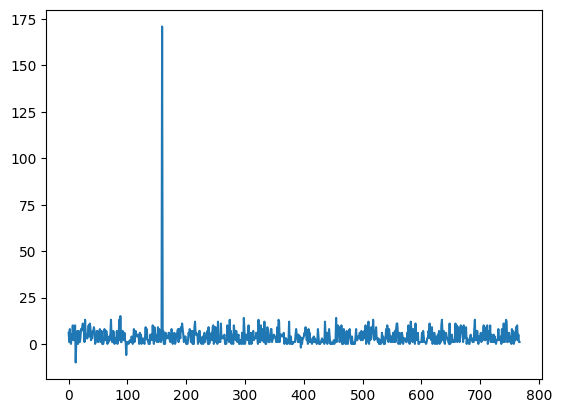

In [7]:
# sprawdzenie listy wystąpień poszczególnych wartości
pre_counts = df['Pregnancies'].value_counts().sort_index()
print(pre_counts)
# wyliczenie średniej dla całości danych
mean_pre_all = df["Pregnancies"].mean()
print(f"Średnia liczba ciąż  dla całości danych: {mean_pre_all}")
# średnia liczba ciąż w przedziale 0 do 20
pre_normal = df['Pregnancies'].between(0, 20)
mean_pre_norm = df[pre_normal]['Pregnancies'].mean()
print(f"Średnia liczba ciąż  w zakresie 0-20: {mean_pre_norm}")
plt.plot(df['Pregnancies'])

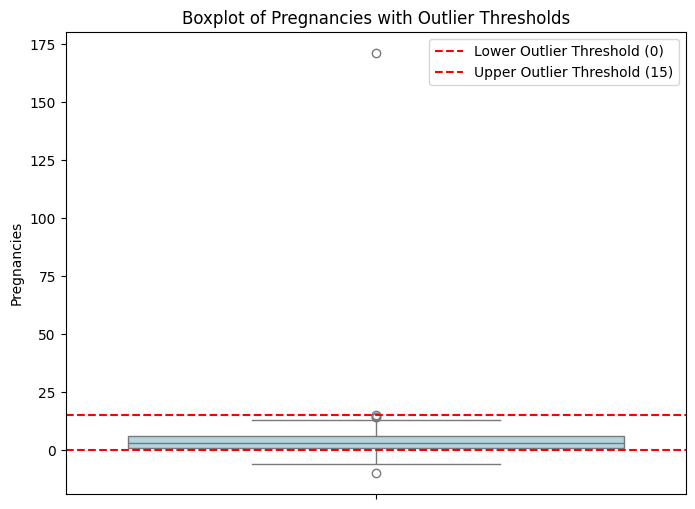

In [8]:
# Tworzenie wykresu boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Pregnancies'], color='lightblue')

# Dodanie czerwonych linii pokazujących granice outlierów
plt.axhline(y=0, color='red', linestyle='--', label='Lower Outlier Threshold (0)')
plt.axhline(y=15, color='red', linestyle='--', label='Upper Outlier Threshold (15)')

plt.ylabel('Pregnancies')
plt.title('Boxplot of Pregnancies with Outlier Thresholds')
plt.legend()
plt.show()

W przypadku kolumny Pregnancies podjęto nastepujące modyfikacje:
* zamiana wartości ujemne na dodatnie (wartością bezwzględną)
* zamienić wartości odstająca (spoza zakresu 0-20) medianę obliczoną na podstawie wartości z tego zakresu
Jako max uznawaną ilość przypadków ciąży uznano ostatnią wartość nieodstającą znacznie od zbioru powiększoną o 5 => 15+5=20

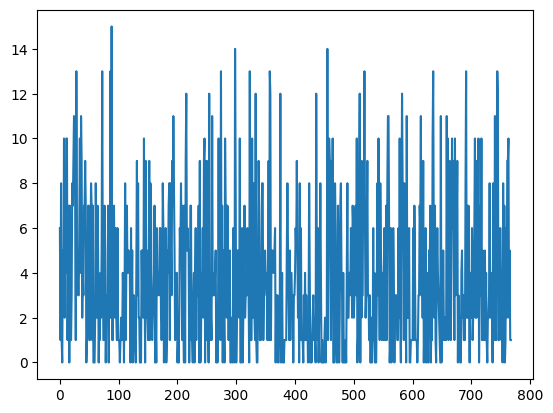

In [9]:
# zamiana wartości ujemnych na dodatnie
df['Pregnancies'] = df['Pregnancies'].abs()
# zamiana na medianę wartości odstających w kolumnie Pregnancies
pre_normal = df['Pregnancies'].between(0, 20)
median_pre = df[pre_normal]['Pregnancies'].median()
df.loc[(df['Pregnancies'] < 0) | (df['Pregnancies'] > 20), 'Pregnancies'] = median_pre
plt.plot(df['Pregnancies'])

Dodatkowe czyszczenie danych odstających dancyh z górnego zakresu przy pomocy IQR

In [10]:
# IQR dla kolumny Pregnancies
Q1_pre = df['Pregnancies'].quantile(0.25)
Q3_pre = df['Pregnancies'].quantile(0.75)
IQR_pre = Q3_pre - Q1_pre

# granice wartości odstających
#lower_bound_pre = Q1_pre - 1.5 * IQR_pre
upper_bound_pre = Q3_pre + 1.5 * IQR_pre

# zastąpienie wartości odstających medianą
df['Pregnancies'] = np.where((df['Pregnancies'] > upper_bound_pre),
                                      df['Pregnancies'].median(), df['Pregnancies'])

Górna granica wartości odstających: 13.5 ciąż


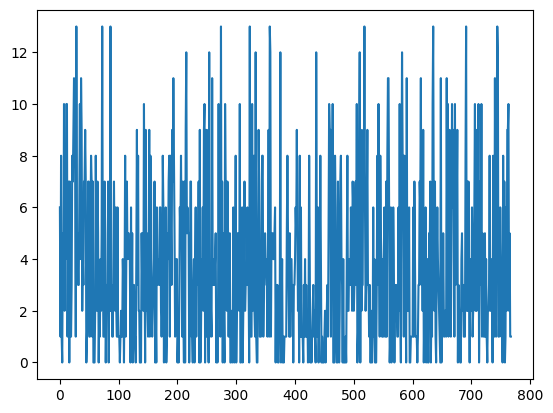

In [11]:
print(f"Górna granica wartości odstających: {upper_bound_pre} ciąż")
plt.plot(df['Pregnancies'])

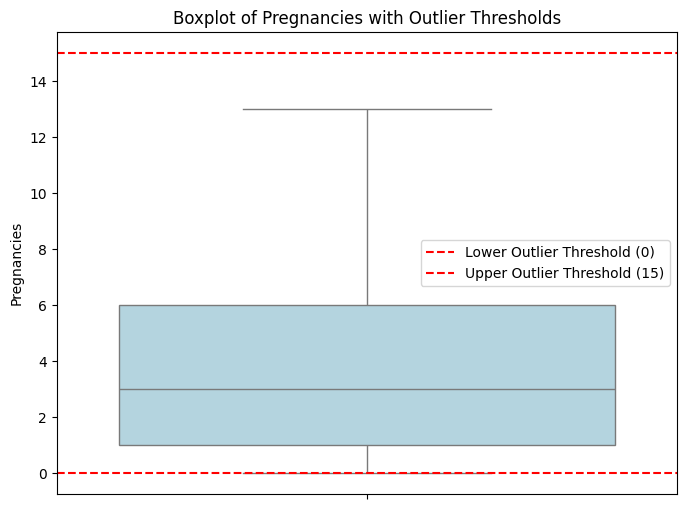

In [12]:
# Tworzenie wykresu boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Pregnancies'], color='lightblue')

# Dodanie czerwonych linii pokazujących granice outlierów
plt.axhline(y=0, color='red', linestyle='--', label='Lower Outlier Threshold (0)')
plt.axhline(y=15, color='red', linestyle='--', label='Upper Outlier Threshold (15)')

plt.ylabel('Pregnancies')
plt.title('Boxplot of Pregnancies with Outlier Thresholds')
plt.legend()
plt.show()

### Kolumna Stężenie glukozy w osoczu po 2 godzinach w doustnym teście tolerancji glukozy ['Glucose']

O prawidłowej tolerancji glukozy mówi się, gdy glukoza po 2 godzinach nie przekracza 140 mg/dl (7,8 mmol/l), stan przedcukrzycowy pojawia się przy poziomie 140-199 mg/dl (7,8-11,1 mmol/l), natomiast cukrzyca diagnozowana jest przy stężeniu powyżej 200 mg/dl (11,1 mmol/l).
O zbyt niskim poziomie glukozy we krwi możemy mówić, gdy u pacjenta pojawiają się takie objawy jak: poziom cukru we krwi wynosi poniżej 70 mg/dl (poniżej 3,9 mmol/l)/
(https://www.cefarm24.pl/czytelnia/natura/glukoza-normy-i-badania/)

Norma glikemii w 120. minucie krzywej cukrowej:
* < 140 mg/dl – wynik prawidłowy
* 140–199 mg/dl – nieprawidłowa tolerancja glukozy
* ≥ 200 mg/dl – cukrzyca

Krzywa cukrowa w ciąży – norma:
* < 92 mg/dl na czczo – wynik prawidłowy
* < 180 mg/dl po 60 minutach od wypicia glukozy – wynik prawidłowy
* < 153 mg/dl po 120 minutach od wypicia glukozy – wynik prawidłowy

https://apteline.pl/artykuly/krzywa-cukrowa-jakie-sa-normy-jak-sie-przygotowac?srsltid=AfmBOopAa8hg9HBYiYe64zXPoZtMR0rsE_6GrC0Xtri1wwfj2b22Gok_

Glucose
0      5
44     1
56     1
57     2
61     1
      ..
195    2
196    3
197    4
198    1
199    1
Name: count, Length: 136, dtype: int64
Średnia stężenia glukozy  dla całości danych: 120.89453125
Średnia stężenia glukozy w zakresie 70-200: 122.57180851063829


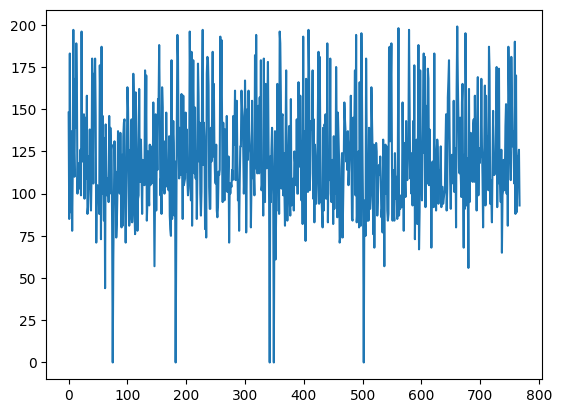

In [13]:
# sprawdzenie listy wystąpień poszczególnych wartości
glu_counts = df['Glucose'].value_counts().sort_index()
print(glu_counts)
# wyliczenie średniej dla całości danych
mean_glu_all = df["Glucose"].mean()
print(f"Średnia stężenia glukozy  dla całości danych: {mean_glu_all}")
# średnie stężenie glukozy w przedziale 70 do 200
glu_real = df['Glucose'].between(70, 200)
mean_glu_real = df[glu_real]['Glucose'].mean()
print(f"Średnia stężenia glukozy w zakresie 70-200: {mean_glu_real}")
plt.plot(df['Glucose'])

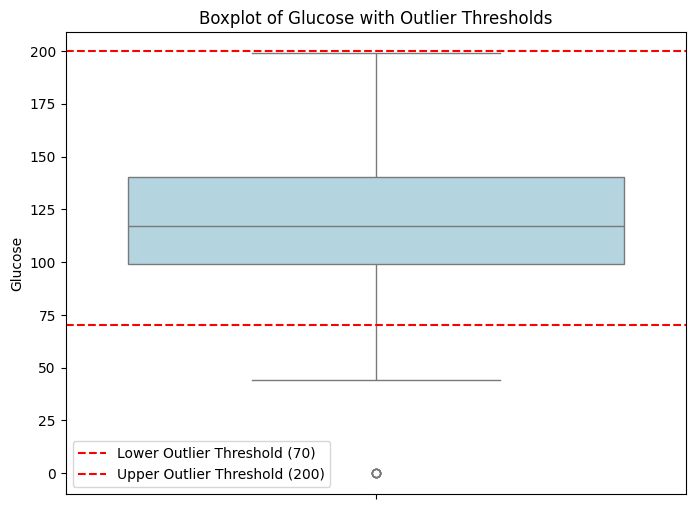

In [14]:
# Tworzenie wykresu boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Glucose'], color='lightblue')

# Dodanie czerwonych linii pokazujących granice outlierów
plt.axhline(y=70, color='red', linestyle='--', label='Lower Outlier Threshold (70)')
plt.axhline(y=200, color='red', linestyle='--', label='Upper Outlier Threshold (200)')

plt.ylabel('Glucose')
plt.title('Boxplot of Glucose with Outlier Thresholds')
plt.legend()
plt.show()

Czyszczenie danych odstających danych z dolnego zakresu przy pomocy IQR (pozostawienie górnych wartości znacznie wpływających na diagnozę cukrzycy, dolne stanowią dość żadkie przypadki, więc ich usunięcie mogłoby zaburzyć model (zwłaszcza wartości 0))

Alternatywne rozwiąnie to usunięcie tylko wartości 0

Dolna granica: 37.125


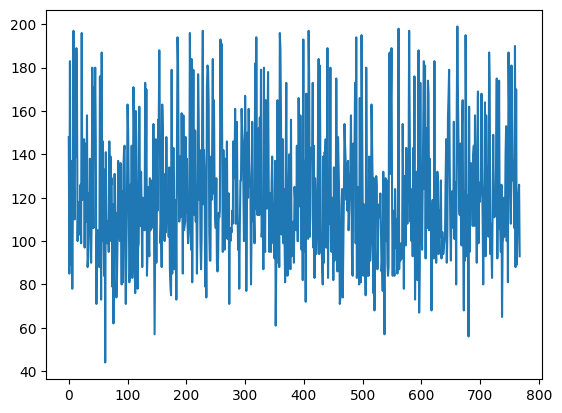

In [15]:
# IQR dla kolumny Glucose
Q1_glu = df['Glucose'].quantile(0.25)
Q3_glu = df['Glucose'].quantile(0.75)
IQR_glu = Q3_glu - Q1_glu

# granice wartości odstających (tylko dolne)
lower_bound_glu = Q1_glu - 1.5 * IQR_glu
print(f'Dolna granica: {lower_bound_glu}')
#upper_bound_glu = Q3_glu + 1.5 * IQR_glu

# zastąpienie wartości odstających medianą
df['Glucose'] = np.where((df['Glucose'] < lower_bound_glu),
                                      df['Glucose'].median(), df['Glucose'])
plt.plot(df['Glucose'])

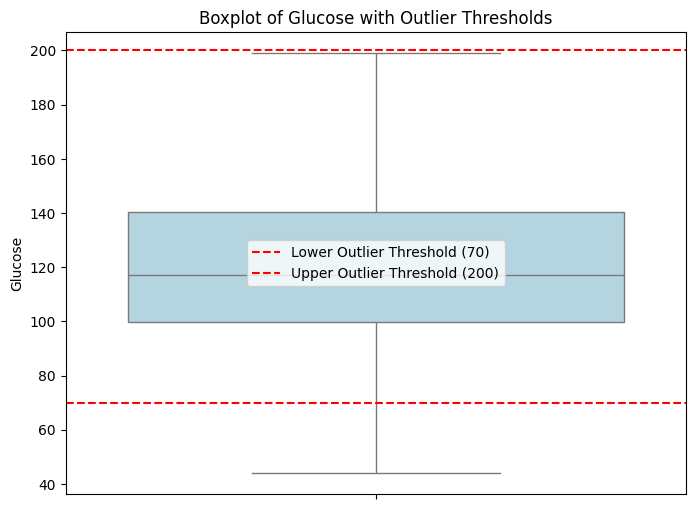

In [16]:
# Tworzenie wykresu boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Glucose'], color='lightblue')

# Dodanie czerwonych linii pokazujących granice outlierów
plt.axhline(y=70, color='red', linestyle='--', label='Lower Outlier Threshold (70)')
plt.axhline(y=200, color='red', linestyle='--', label='Upper Outlier Threshold (200)')

plt.ylabel('Glucose')
plt.title('Boxplot of Glucose with Outlier Thresholds')
plt.legend()
plt.show()

### Kolumna Rozkurczowe ciśnienie krwi (mm Hg) ['BloodPressure']

Jaka jest prawidłowa wartość ciśnienia rozkurczowego?
Ciśnienie rozkurczowe powinno mieć wartość poniżej 90 mmHg.

Można je też przyporządkować do jednej z trzech kategorii:

Ciśnienie optymalne rozkurczowe: poniżej 80 mmHg;
Ciśnienie prawidłowe rozkurczowe: 80-84 mmHg;
Ciśnienie wysokie prawidłowe rozkurczowe: 85-89 mmHg.
(https://apteline.pl/artykuly/krzywa-cukrowa-jakie-sa-normy-jak-sie-przygotowac?srsltid=AfmBOopAa8hg9HBYiYe64zXPoZtMR0rsE_6GrC0Xtri1wwfj2b22Gok_)

Minimum: "ciśnienie rozkurczowe poniżej 50 mmHg powinno być pewnego rodzaju sygnałem alarmowym." (https://www.adamed.expert/pacjent/choroby-i-objawy/serce-i-naczynia/niskie-cisnienie-rozkurczowe)



BloodPressure
0      35
24      1
30      2
38      1
40      1
44      4
46      2
48      5
50     13
52     11
54     11
55      2
56     12
58     21
60     37
61      1
62     34
64     43
65      7
66     30
68     45
70     57
72     44
74     52
75      8
76     39
78     45
80     40
82     30
84     23
85      6
86     21
88     25
90     22
92      8
94      6
95      1
96      4
98      3
100     3
102     1
104     2
106     3
108     2
110     3
114     1
122     1
Name: count, dtype: int64
Średnia ciśnienia rozkurczowego krwi dla całości danych: 69.10546875
Średnia ciśnienia rozkurczowego krwi w zakresie 50-90: 71.60530191458027


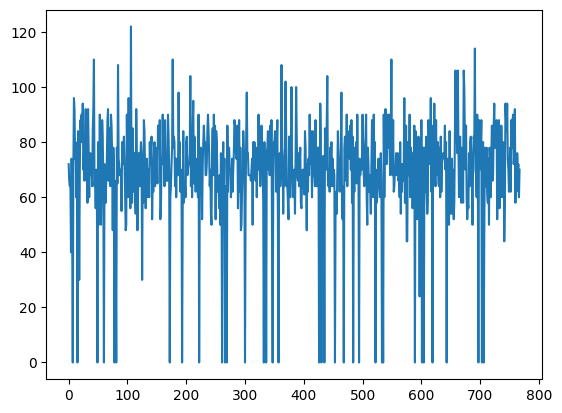

In [17]:
# sprawdzenie listy wystąpień poszczególnych wartości
blupress_counts = df['BloodPressure'].value_counts().sort_index()
print(blupress_counts)
# wyliczenie średniej dla całości danych
mean_blupress_all = df["BloodPressure"].mean()
print(f"Średnia ciśnienia rozkurczowego krwi dla całości danych: {mean_blupress_all}")
# średnia ciśnienia rozkurczowego krwi w przedziale 50 do 90
blupress_real = df['BloodPressure'].between(50, 90)
mean_blupress_real = df[blupress_real]['BloodPressure'].mean()
print(f"Średnia ciśnienia rozkurczowego krwi w zakresie 50-90: {mean_blupress_real}")
plt.plot(df['BloodPressure'])

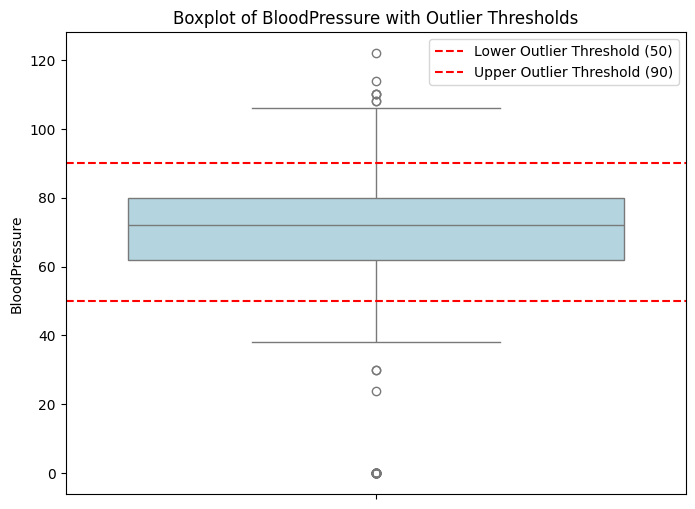

In [18]:
# Tworzenie wykresu boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['BloodPressure'], color='lightblue')

# Dodanie czerwonych linii pokazujących granice outlierów
plt.axhline(y=50, color='red', linestyle='--', label='Lower Outlier Threshold (50)')
plt.axhline(y=90, color='red', linestyle='--', label='Upper Outlier Threshold (90)')

plt.ylabel('BloodPressure')
plt.title('Boxplot of BloodPressure with Outlier Thresholds')
plt.legend()
plt.show()

Postanowiono zamienić wartości odstające za pomocą IQR

Widoczna jest duża rozpiętość danych. Pozstanowiliśmy zwiększyć procent uwzględnianych odchyleń i zamienić wartości odstające na wartości z przedziału ponad dormatywnego do granicy wartości odstających:
* górne: na medianę z przedziału: (90, upper_bound_blo)
* dolne: na medianę z przedziału: (lower_bound_blo, 50)


Mediana dla górnego zakresu (90, 107.0): 92.0
Mediana dla dolnego zakresu (35.0, 50): 49.0


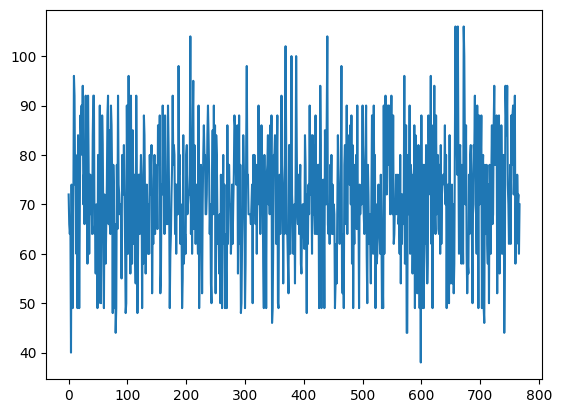

In [19]:
# IQR dla kolumny BloodPressure
Q1_blo = df['BloodPressure'].quantile(0.25)
Q3_blo = df['BloodPressure'].quantile(0.75)
IQR_blo = Q3_blo - Q1_blo

# granice wartości odstających
lower_bound_blo = Q1_blo - 1.5 * IQR_blo
upper_bound_blo = Q3_blo + 1.5 * IQR_blo

# ustalenie przedziałów do mediany
upper_median_blo = df[df['BloodPressure'].between(90, upper_bound_blo)]['BloodPressure'].median()
lower_median_blo = df[df['BloodPressure'].between(lower_bound_blo, 50)]['BloodPressure'].median()

print(f"Mediana dla górnego zakresu (90, {upper_bound_blo}): {upper_median_blo}")
print(f"Mediana dla dolnego zakresu ({lower_bound_blo}, 50): {lower_median_blo}")

# zastąpienie wartości odstających:
df['BloodPressure'] = np.where((df['BloodPressure'] > upper_bound_blo),
                                      upper_median_blo, df['BloodPressure'])
df['BloodPressure'] = np.where((df['BloodPressure'] < lower_bound_blo),
                                      lower_median_blo, df['BloodPressure'])

plt.plot(df['BloodPressure'])

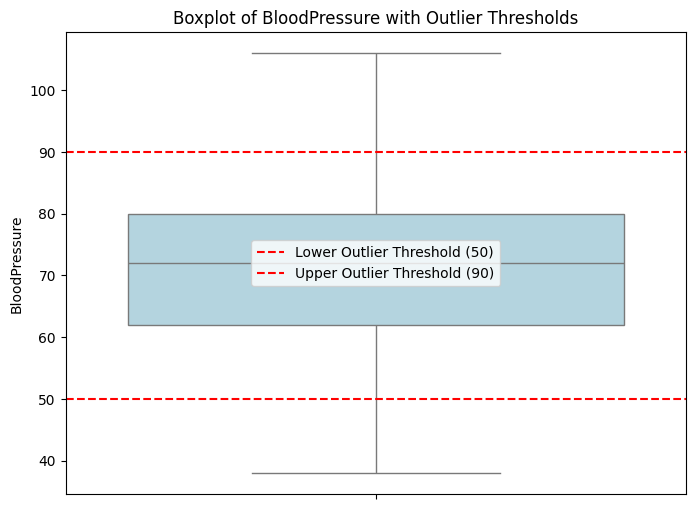

In [20]:
# Tworzenie wykresu boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['BloodPressure'], color='lightblue')

# Dodanie czerwonych linii pokazujących granice outlierów
plt.axhline(y=50, color='red', linestyle='--', label='Lower Outlier Threshold (50)')
plt.axhline(y=90, color='red', linestyle='--', label='Upper Outlier Threshold (90)')

plt.ylabel('BloodPressure')
plt.title('Boxplot of BloodPressure with Outlier Thresholds')
plt.legend()
plt.show()

### Kolumna Grubość fałdu skórnego tricepsa (mm) ['SkinThickness']

SkinThickness
0     227
7       2
8       2
10      5
11      6
12      7
13     11
14      6
15     14
16      6
17     14
18     20
19     18
20     13
21     10
22     16
23     22
24     12
25     16
26     16
27     23
28     20
29     17
30     27
31     19
32     31
33     20
34      8
35     15
36     14
37     16
38      7
39     18
40     16
41     15
42     11
43      6
44      5
45      6
46      8
47      4
48      4
49      3
50      3
51      1
52      2
54      2
56      1
60      1
63      1
99      1
Name: count, dtype: int64
Średnia grubość fałdu dla całości danych: 20.536458333333332
Średnia grubość fałdu w zakresie 50-90: 53.81818181818182


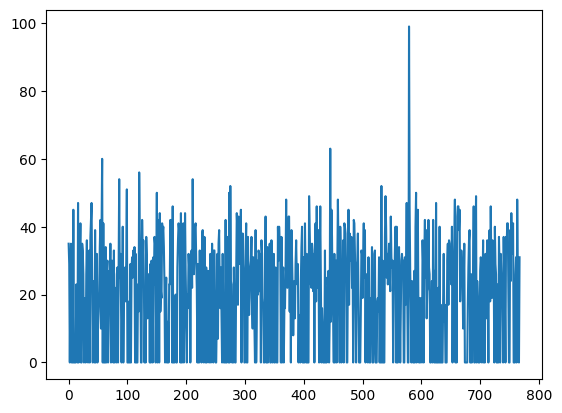

In [21]:
# sprawdzenie listy wystąpień poszczególnych wartości
skinth_counts = df['SkinThickness'].value_counts().sort_index()
print(skinth_counts)
# wyliczenie średniej dla całości danych
mean_skinth_all = df["SkinThickness"].mean()
print(f"Średnia grubość fałdu dla całości danych: {mean_skinth_all}")
# średnia grubość fałdu skórnego tricepsa w przedziale 50 do 90
skinth_real = df['SkinThickness'].between(50, 90)
mean_skinth_real = df[skinth_real]['SkinThickness'].mean()
print(f"Średnia grubość fałdu w zakresie 50-90: {mean_skinth_real}")
plt.plot(df['SkinThickness'])

<ipython-input-22-2049576602>:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


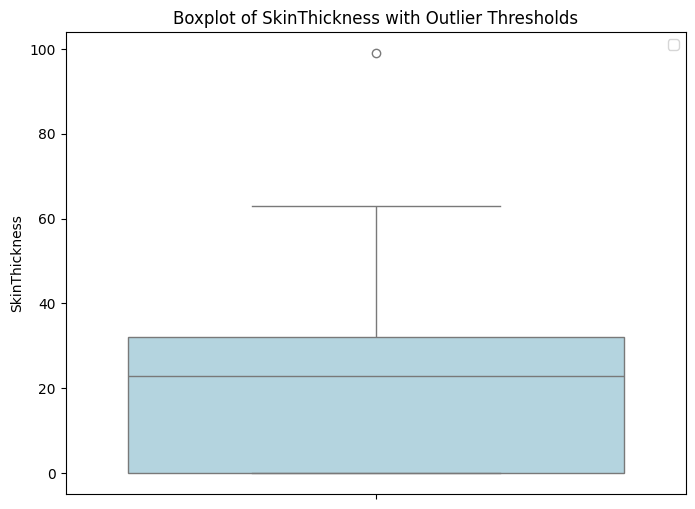

In [22]:
# Tworzenie wykresu boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['SkinThickness'], color='lightblue')

plt.ylabel('SkinThickness')
plt.title('Boxplot of SkinThickness with Outlier Thresholds')
plt.legend()
plt.show()

W wartości danych widoczny jest wystepowanie jedynie górnych wartości odstających.
Dla pozostawienia cechy "wysokiej wartości jakościowej" zmieniannych danych postanowiono zamienić górne wartości odstające na medianę górnego z zakresu wartości (mediana dla całości, upper_bound_blo)


Mediana dla górnego zakresu (23.0, 80.0): 32.0


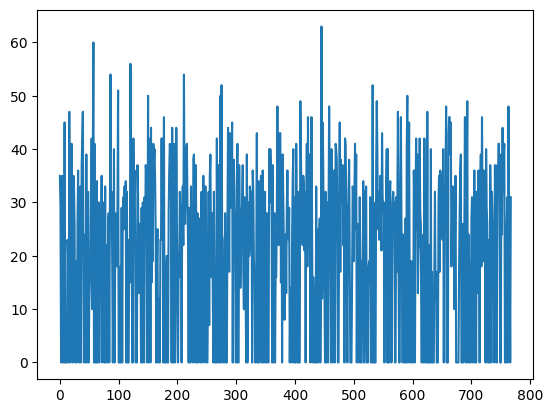

In [23]:
# mediana dla całości danych
median_skinthick = df['SkinThickness'].median()

# IQR dla kolumny SkinThickness
Q1_skth = df['SkinThickness'].quantile(0.25)
Q3_skth = df['SkinThickness'].quantile(0.75)
IQR_skth = Q3_skth - Q1_skth

# granice wartości odstających (tylko górne)
upper_bound_skth = Q3_skth + 1.5 * IQR_skth

# ustalenie przedziałów do mediany
upper_median_skth = df[df['SkinThickness'].between(median_skinthick, upper_bound_skth)]['SkinThickness'].median()

print(f"Mediana dla górnego zakresu ({median_skinthick}, {upper_bound_skth}): {upper_median_skth}")

# zastąpienie wartości odstających:
df['SkinThickness'] = np.where((df['SkinThickness'] > upper_bound_skth),
                                      upper_median_skth, df['SkinThickness'])

plt.plot(df['SkinThickness'])

<ipython-input-24-2049576602>:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


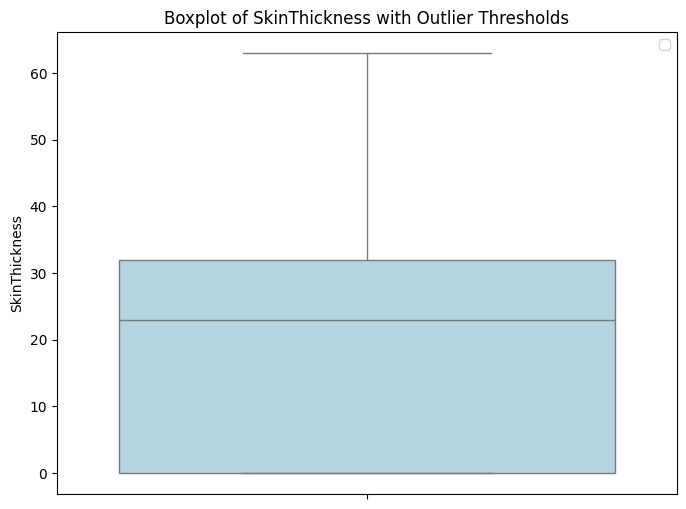

In [24]:
# Tworzenie wykresu boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['SkinThickness'], color='lightblue')

plt.ylabel('SkinThickness')
plt.title('Boxplot of SkinThickness with Outlier Thresholds')
plt.legend()
plt.show()

### Kolumna 2-godzinne stężenie insuliny w surowicy (mu U/ml) ['Insulin']

Poziom insuliny na czczo nie powinien przekraczać 10 mU/ml. Natomiast przy krzywej insulinowej, poziom insuliny po 1 godzinie od spożycia glukozy nie powinien być wyższy niż 50 mU/ml, a po 2. godzinach – 30 mU/ml.

(https://www.doz.pl/czytelnia/a16025-Insulina__normy_we_krwi_wskazania_cena._Badanie_insuliny_po_obciazeniu._Czy_hiperglikemia_i_hipoglikemia_sa_grozne_dla_zycia)

Insulin
0      374
14       1
15       1
16       1
18       2
      ... 
579      1
600      1
680      1
744      1
846      1
Name: count, Length: 186, dtype: int64
Średnia stężenia insuliny dla całości danych: 79.79947916666667


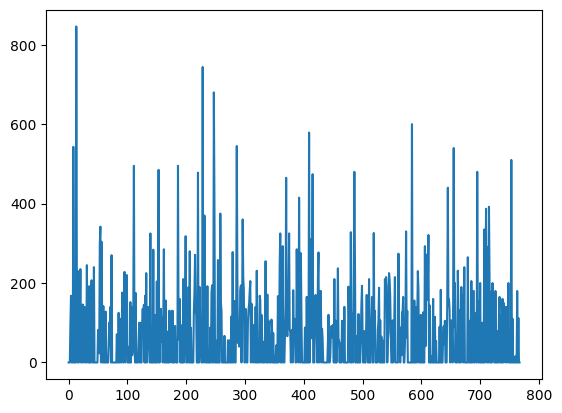

In [25]:
# sprawdzenie listy wystąpień poszczególnych wartości
insulin_counts = df['Insulin'].value_counts().sort_index()
print(insulin_counts)
# wyliczenie średniej dla całości danych
mean_insulin_all = df["Insulin"].mean()
print(f"Średnia stężenia insuliny dla całości danych: {mean_insulin_all}")
plt.plot(df['Insulin'])

<ipython-input-26-382107285>:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


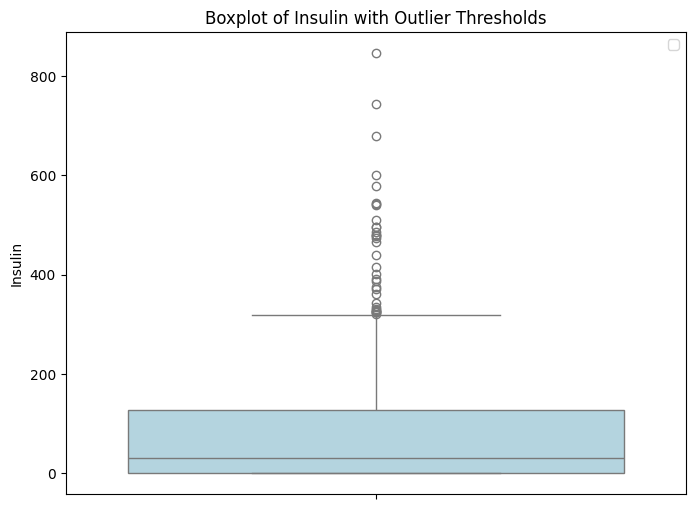

In [26]:
# Tworzenie wykresu boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Insulin'], color='lightblue')

plt.ylabel('Insulin')
plt.title('Boxplot of Insulin with Outlier Thresholds')
plt.legend()
plt.show()

Ze względu na dużą rozpiętość górnych wartości odstających postanowiliśmy wykorzytsując IQR przyrównać je do wartości górnej granicy wartości odstających (upper_bound_ins)

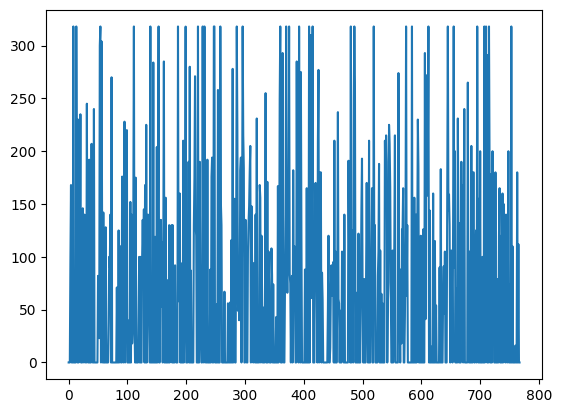

In [27]:
# IQR dla kolumny Insulin
Q1_ins = df['Insulin'].quantile(0.25)
Q3_ins = df['Insulin'].quantile(0.75)
IQR_ins = Q3_ins - Q1_ins

# granice wartości odstających (tylko górne)
upper_bound_ins = Q3_ins + 1.5 * IQR_ins

# zastąpienie wartości odstających medianą
df['Insulin'] = np.where((df['Insulin'] > upper_bound_ins),
                                      upper_bound_ins, df['Insulin'])
plt.plot(df['Insulin'])

<ipython-input-28-382107285>:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


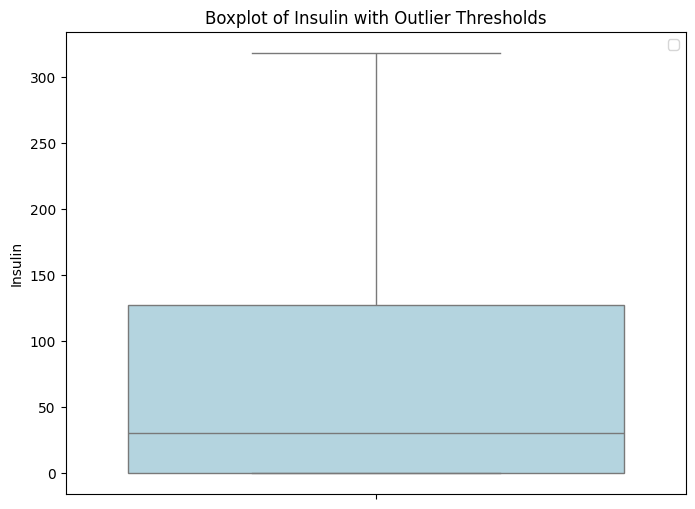

In [28]:
# Tworzenie wykresu boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Insulin'], color='lightblue')

plt.ylabel('Insulin')
plt.title('Boxplot of Insulin with Outlier Thresholds')
plt.legend()
plt.show()

### Kolumna Wskaźnik masy ciała (waga w kg/(wzrost w m)^2) ['BMI']

BMI < 16 = III stopień niedowagi
BMI powyżej 40 = otyłość III stopnia

(https://www.doz.pl/czytelnia/a16102-BMI__czym_jest_i_jak_obliczyc_Body_Mass_Index_Dlaczego_obecnie_uwaza_sie_ze_BMI_to_wskaznik_daleki_od_doskonalosci)

BMI
0.0     11
18.2     3
18.4     1
19.1     1
19.3     1
        ..
53.2     1
55.0     1
57.3     1
59.4     1
67.1     1
Name: count, Length: 248, dtype: int64
Średnia BMI dla całości danych: 31.992578124999998
Średnia BMI w zakresie 16-40: 30.666717095310133


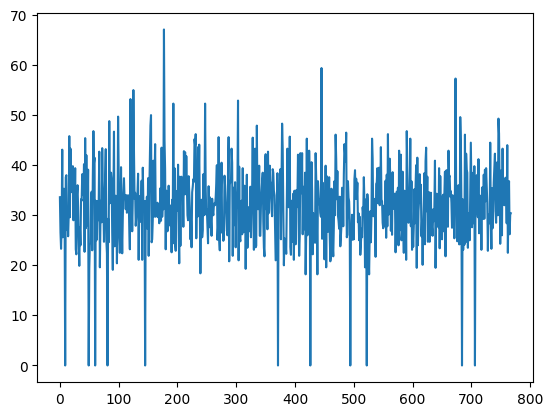

In [29]:
# sprawdzenie listy wystąpień poszczególnych wartości
bmi_counts = df['BMI'].value_counts().sort_index()
print(bmi_counts)
# wyliczenie średniej dla całości danych
mean_bmi_all = df["BMI"].mean()
print(f"Średnia BMI dla całości danych: {mean_bmi_all}")
# średnie BMI w przedziale 1 do 50 (bez 0 i do normy 50)
bmi_real = df['BMI'].between(16, 40)
mean_bmi_real = df[bmi_real]['BMI'].mean()
print(f"Średnia BMI w zakresie 16-40: {mean_bmi_real}")
plt.plot(df['BMI'])

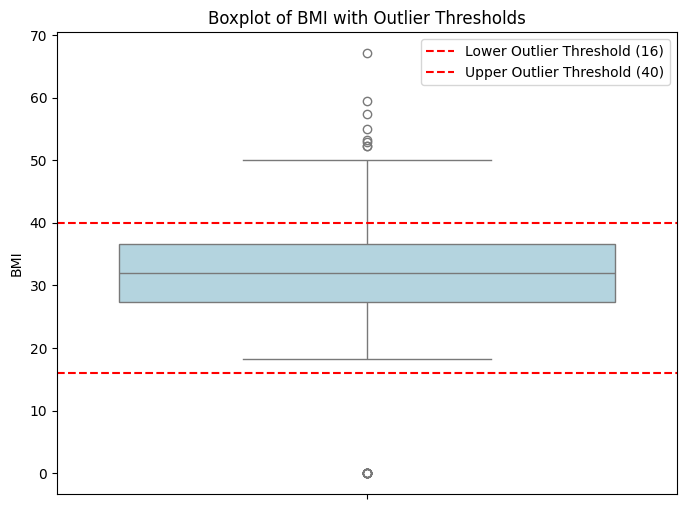

In [30]:
# Tworzenie wykresu boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['BMI'], color='lightblue')

# Dodanie czerwonych linii pokazujących granice outlierów
plt.axhline(y=16, color='red', linestyle='--', label='Lower Outlier Threshold (16)')
plt.axhline(y=40, color='red', linestyle='--', label='Upper Outlier Threshold (40)')

plt.ylabel('BMI')
plt.title('Boxplot of BMI with Outlier Thresholds')
plt.legend()
plt.show()

Dane skrajnie odstające są liczne i mogą zaburzać model, propozycja modyfikacji danych to zamiana wartości skrajnych przy użyciu obliczenia IQR. Warości odstające zostaną zastąpione odpowiednio: górne - górną, a dolne dolną granicą wartości odstających


Dolna granica: 13.35
Górna granica: 50.550000000000004


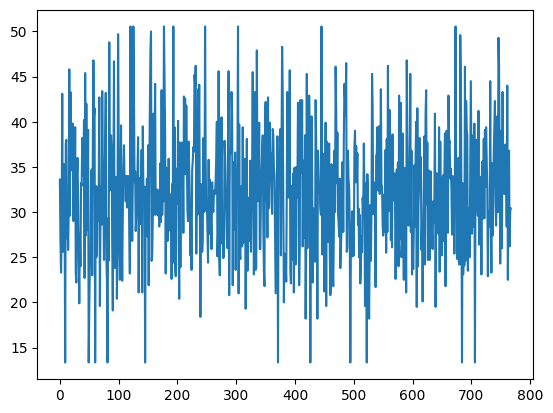

In [31]:
# IQR dla kolumny BloodPressure
Q1_bmi = df['BMI'].quantile(0.25)
Q3_bmi = df['BMI'].quantile(0.75)
IQR_bmi = Q3_bmi - Q1_bmi

# granice wartości odstających
lower_bound_bmi = Q1_bmi - 1.5 * IQR_bmi
upper_bound_bmi = Q3_bmi + 1.5 * IQR_bmi
print(f"Dolna granica: {lower_bound_bmi}")
print(f"Górna granica: {upper_bound_bmi}")

# zastąpienie wartości odstających:
df['BMI'] = np.where((df['BMI'] > upper_bound_bmi),
                                      upper_bound_bmi, df['BMI'])
df['BMI'] = np.where((df['BMI'] < lower_bound_bmi),
                                      lower_bound_bmi, df['BMI'])

plt.plot(df['BMI'])

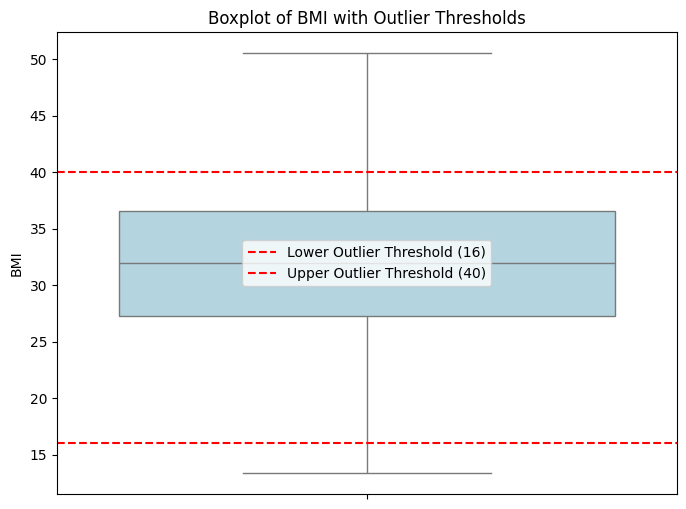

In [32]:
# Tworzenie wykresu boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['BMI'], color='lightblue')

# Dodanie czerwonych linii pokazujących granice outlierów
plt.axhline(y=16, color='red', linestyle='--', label='Lower Outlier Threshold (16)')
plt.axhline(y=40, color='red', linestyle='--', label='Upper Outlier Threshold (40)')

plt.ylabel('BMI')
plt.title('Boxplot of BMI with Outlier Thresholds')
plt.legend()
plt.show()

### Kolumna Funkcja rodowodu cukrzycy ['DiabetesPedigree']

DiabetesPedigree
0.078    1
0.084    1
0.085    2
0.088    2
0.089    1
        ..
1.893    1
2.137    1
2.288    1
2.329    1
2.420    1
Name: count, Length: 517, dtype: int64
Średnia funkcja rodowodu cukrzycy dla całości danych: 0.47187630208333325


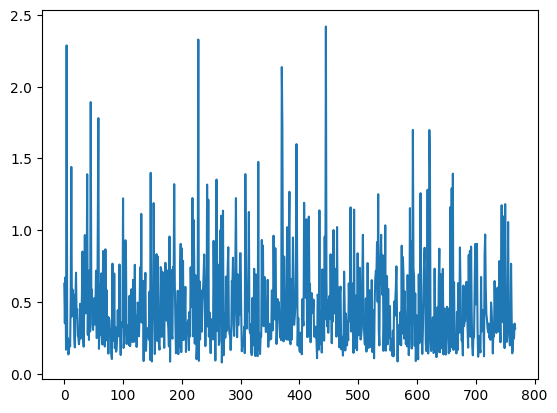

In [33]:
# sprawdzenie listy wystąpień poszczególnych wartości
ped_counts = df['DiabetesPedigree'].value_counts().sort_index()
print(ped_counts)
# wyliczenie średniej dla całości danych
mean_ped_all = df["DiabetesPedigree"].mean()
print(f"Średnia funkcja rodowodu cukrzycy dla całości danych: {mean_ped_all}")
plt.plot(df['DiabetesPedigree'])

<ipython-input-34-2042115576>:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


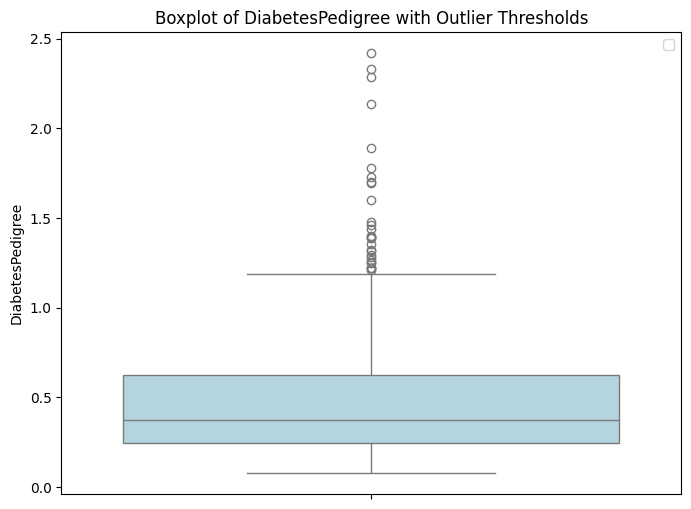

In [34]:
# Tworzenie wykresu boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['DiabetesPedigree'], color='lightblue')

plt.ylabel('DiabetesPedigree')
plt.title('Boxplot of DiabetesPedigree with Outlier Thresholds')
plt.legend()
plt.show()

W celu zmniejszenia rozrzutu danych podjęto się zamiany wartości powyżej górnj granicy na wartość górnej granicy

In [35]:
# Oblicz IQR dla kolumny DiabetesPedigree
Q1_ped = df['DiabetesPedigree'].quantile(0.25)
Q3_ped = df['DiabetesPedigree'].quantile(0.75)
IQR_ped = Q3_ped - Q1_ped

# Określ granice wartości odstających (górne)
lower_bound_ped = Q1_ped - 1.5 * IQR_ped
upper_bound_ped = Q3_ped + 1.5 * IQR_ped

# Zastąp wartości odstające medianą
df['DiabetesPedigree'] = np.where( (df['DiabetesPedigree'] > upper_bound_ped),
                                      upper_bound_ped, df['DiabetesPedigree'])

<ipython-input-36-925908039>:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


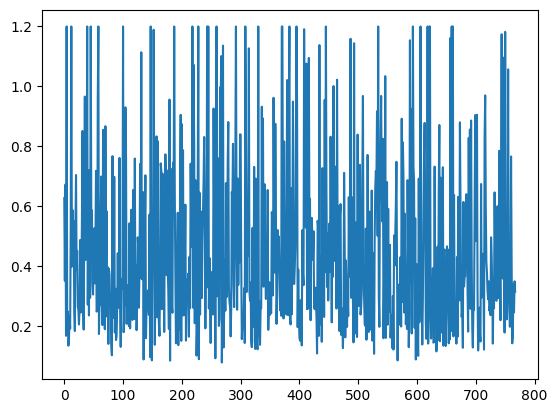

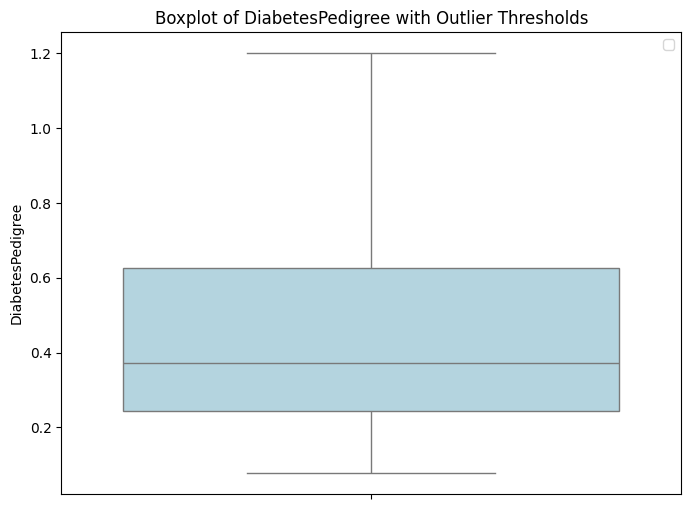

In [36]:
plt.plot(df['DiabetesPedigree'])
# Tworzenie wykresu boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['DiabetesPedigree'], color='lightblue')

plt.ylabel('DiabetesPedigree')
plt.title('Boxplot of DiabetesPedigree with Outlier Thresholds')
plt.legend()
plt.show()

### Kolumna Wiek ['Age']

In [37]:
# sprawdzenie listy wystąpień poszczególnych wartości wieku
age_counts = df['Age'].value_counts().sort_index()
print(age_counts)
# wyliczenie średniej dla całości danych
mean_age_all = df["Age"].mean()
print(f"Średni wiek dla całości danych: {mean_age_all}")
# średni wiek w przedziale 0 do 100
ages_normal = df['Age'].between(0, 100)
mean_age_norm = df[ages_normal]['Age'].mean()
print(f"Średnia wieku w zakresie 0-100: {mean_age_norm}")

Age
-50.0        1
-45.0        1
 21.0       63
 22.0       71
 23.0       38
 24.0       46
 25.0       48
 26.0       33
 27.0       32
 28.0       35
 29.0       32
 30.0       20
 31.0       24
 32.0       16
 33.0       17
 34.0       14
 35.0       10
 36.0       16
 37.0       18
 38.0       15
 39.0       12
 40.0       13
 41.0       22
 42.0       18
 43.0       13
 44.0        8
 45.0       14
 46.0       13
 47.0        6
 48.0        5
 49.0        5
 50.0        7
 51.0        8
 52.0        8
 53.0        5
 54.0        6
 55.0        4
 56.0        3
 57.0        5
 58.0        7
 59.0        3
 60.0        5
 61.0        2
 62.0        4
 63.0        4
 64.0        1
 65.0        3
 66.0        4
 67.0        3
 68.0        1
 69.0        2
 70.0        1
 72.0        1
 81.0        1
 30000.0     1
Name: count, dtype: int64
Średni wiek dla całości danych: 72.00390625
Średnia wieku w zakresie 0-100: 33.19477124183007


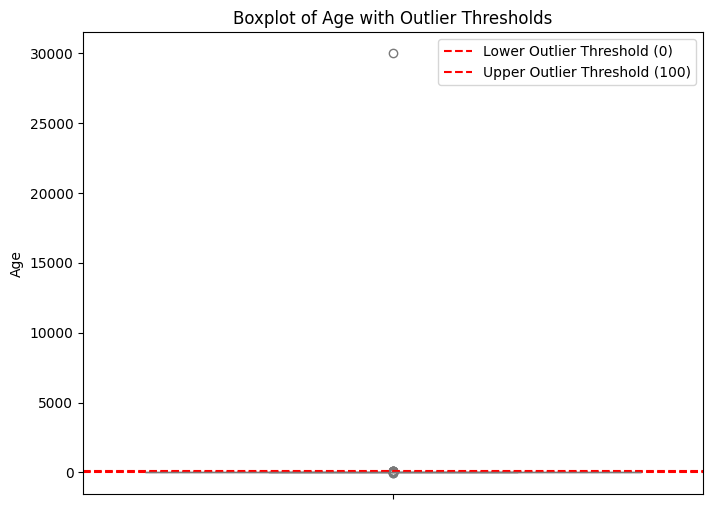

In [38]:
# Tworzenie wykresu boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Age'], color='lightblue')

# Dodanie czerwonych linii pokazujących granice outlierów
plt.axhline(y=0, color='red', linestyle='--', label='Lower Outlier Threshold (0)')
plt.axhline(y=100, color='red', linestyle='--', label='Upper Outlier Threshold (100)')

plt.ylabel('Age')
plt.title('Boxplot of Age with Outlier Thresholds')
plt.legend()
plt.show()

Wartość średnia bierze pod uwagę wartości skrajnie odstające (30000) znacznie zaburzając wynik średniej. Postanowiliśmy:
* zamienić wartości ujemne na dodatnie (wartością bezwzględną)
* zamienić wartości odstająca (spoza zakresu 0-100) średnią obliczoną na podstawie wartości z tego zakresu (0-100)

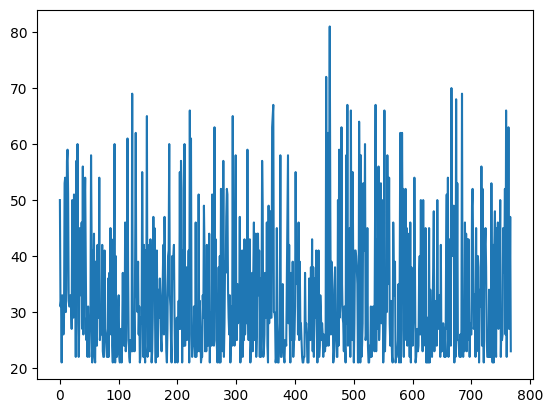

In [39]:
# zamiana wartości ujemnych na dodatnie
df['Age'] = df['Age'].abs()
# zamiana na średnią wartości odstających w kolumnie Age
ages_normal = df['Age'].between(0, 100)
mean_age = df[ages_normal]['Age'].mean()
df.loc[(df['Age'] < 0) | (df['Age'] > 100), 'Age'] = mean_age
plt.plot(df['Age'])

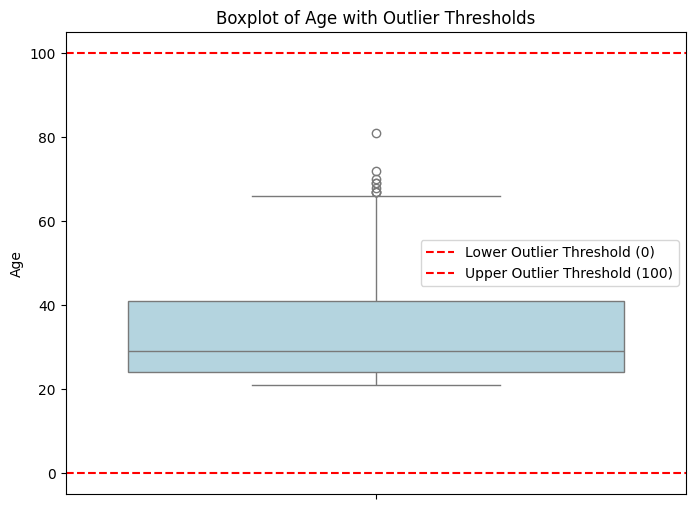

In [40]:
# Tworzenie wykresu boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Age'], color='lightblue')

# Dodanie czerwonych linii pokazujących granice outlierów
plt.axhline(y=0, color='red', linestyle='--', label='Lower Outlier Threshold (0)')
plt.axhline(y=100, color='red', linestyle='--', label='Upper Outlier Threshold (100)')

plt.ylabel('Age')
plt.title('Boxplot of Age with Outlier Thresholds')
plt.legend()
plt.show()

Warto zamienić jeszcze górne wartości odstające na granicę przy pomocy IQR:

In [41]:
# IQR dla kolumny Age
Q1_age = df['Age'].quantile(0.25)
Q3_age = df['Age'].quantile(0.75)
IQR_age = Q3_age - Q1_age

# granice wartości odstających
upper_bound_age = Q3_age + 1.5 * IQR_age

# zastąpienie wartości odstających medianą
df['Age'] = np.where((df['Age'] > upper_bound_age),
                                      upper_bound_age, df['Age'])

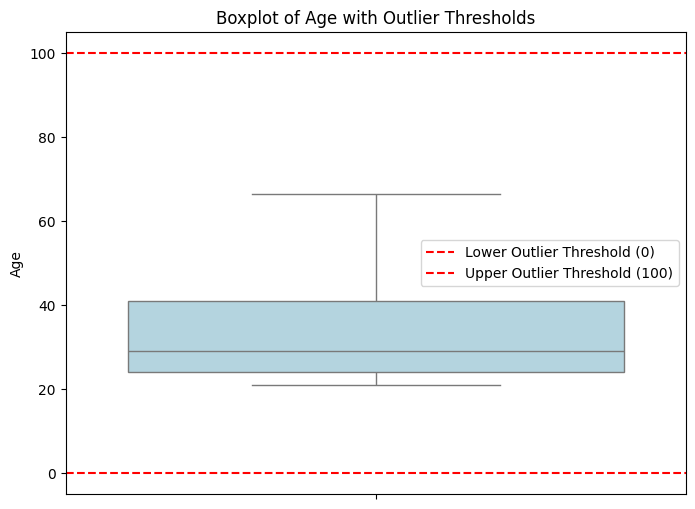

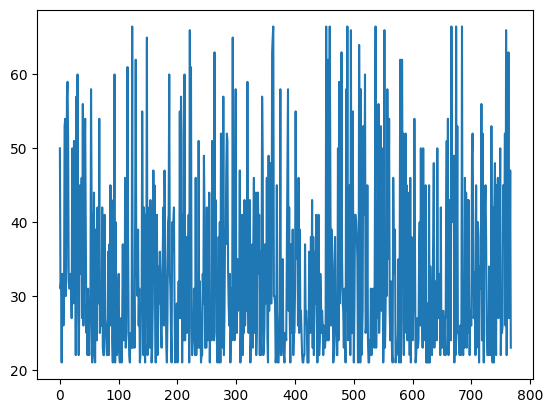

In [42]:
# Tworzenie wykresu boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Age'], color='lightblue')

# Dodanie czerwonych linii pokazujących granice outlierów
plt.axhline(y=0, color='red', linestyle='--', label='Lower Outlier Threshold (0)')
plt.axhline(y=100, color='red', linestyle='--', label='Upper Outlier Threshold (100)')

plt.ylabel('Age')
plt.title('Boxplot of Age with Outlier Thresholds')
plt.legend()
plt.show()

plt.plot(df['Age'])

### Kolumna Czy zdiagnozowano cukrzyce ['Diabetes']

Zamiana wartości w kolumnie "Czy zdiagnozowano cukrzyce" na 1 jeśli tak (Yes) i 0 jeśli nie (No)

In [43]:
# sprawdzamy warianty wartości w kolumnie Diabetes
print(df['Diabetes'].unique())

['Yes' 'No']


In [44]:
# zamieniamy wartości w kolumnie Diabetes na zmienne typu integer (0/1) przy uzyciu mapowania
yesno_diabetics = {"Yes": 1, "No": 0}
if df['Diabetes'].dtype == 'object':
  df['Diabetes'] = df['Diabetes'].map(yesno_diabetics)
  df['Diabetes'].fillna(0, inplace=True)
  df['Diabetes'] = df['Diabetes'].astype(int)
else:
  print("The 'Diabetes' column is not of object type. Check the data.")

<ipython-input-44-2927457026>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Diabetes'].fillna(0, inplace=True)


### Badanie korelacji pomiędzy zmiennymi

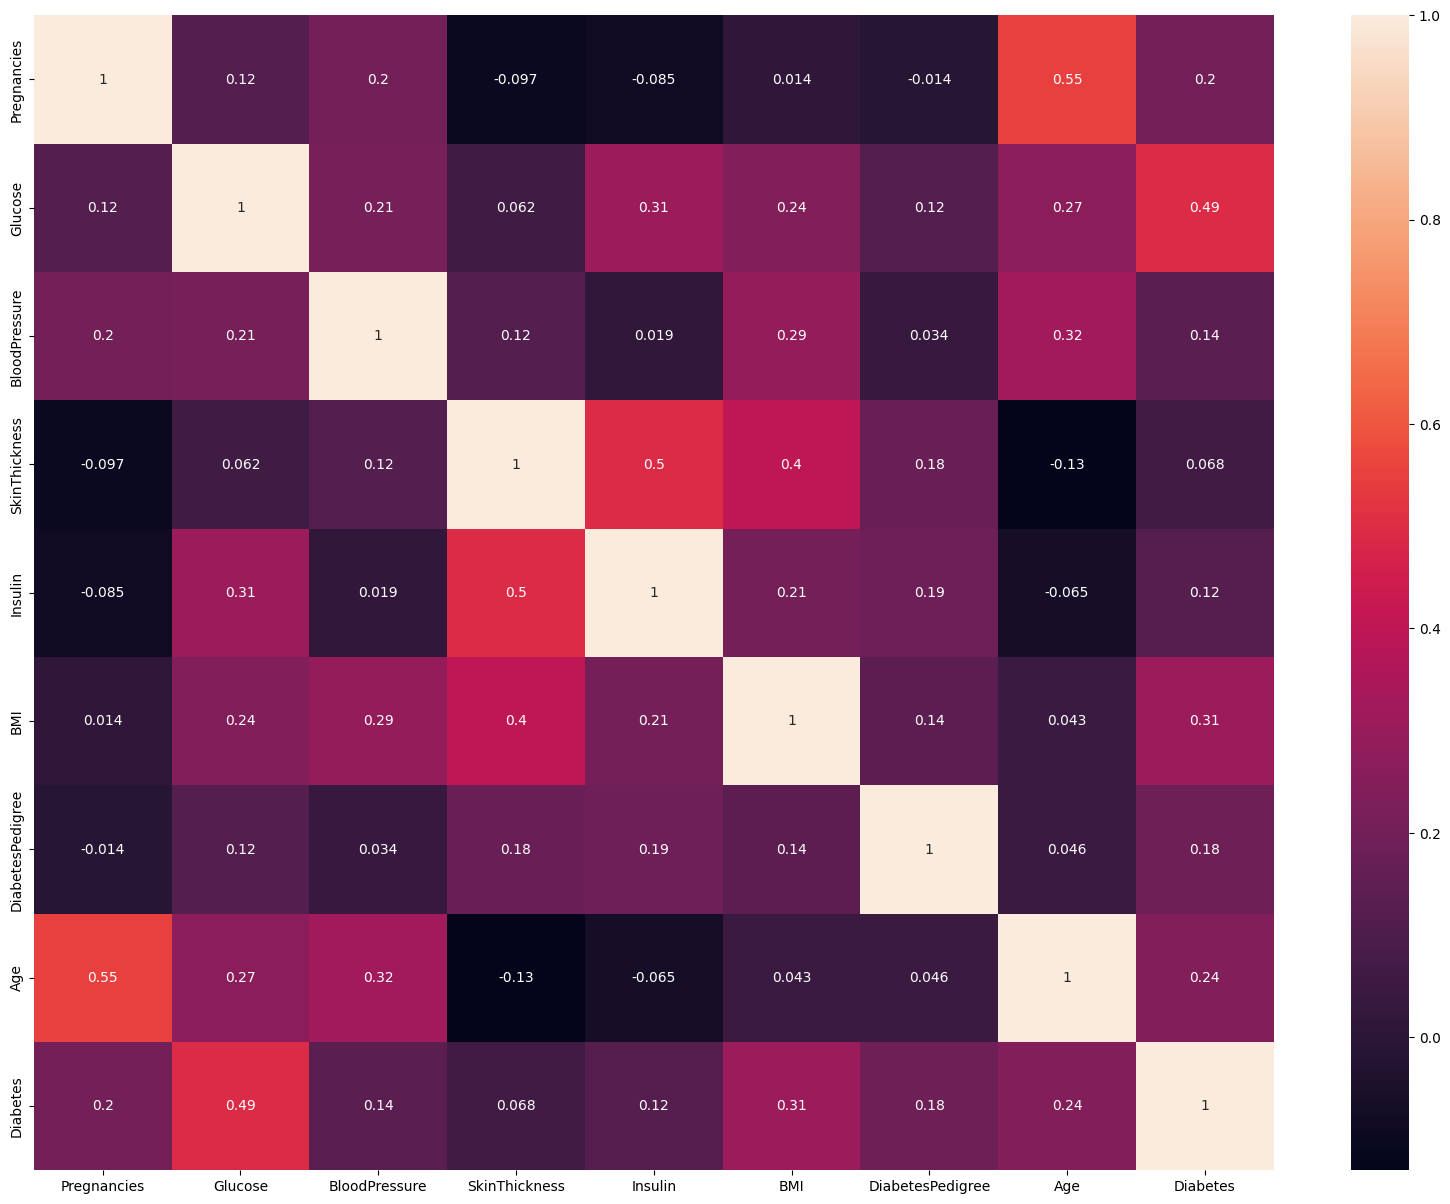

In [45]:
corr_matrix = df.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True)
plt.show()

Korelacje większe niż 0.3

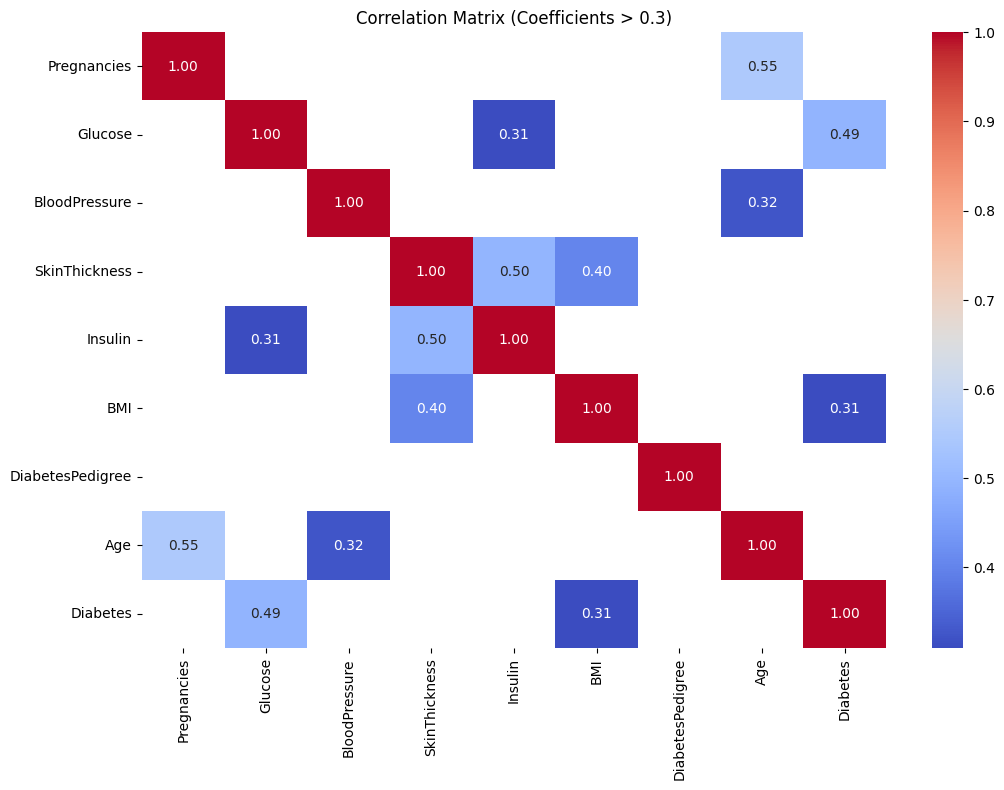

In [46]:
# korelacje > 0.3
# korelacje większe niż 0.3
corr_matrix = df.corr()
high_corr = corr_matrix[abs(corr_matrix) > 0.3]

# wykres korelacji większych niż 0.2
plt.figure(figsize=(12, 8))
sns.heatmap(high_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Coefficients > 0.3)')
plt.show()

Powiązania zmiennych z dużym potencjałem do złączenia w jedną zmienną:
* BMI + SkinThickness = 0.4 - oba powiązane z masą ciała
* Glucose + Insulin = 0.33 - oba powiązane z gromadzeniem glukozy w organiźmie

Nie rozważamy wiązania istotnej zmiennej - czy wykryto cukrzycę (Diabeties) z żadną inną, poniważ może być istotną kolumną kontrolną w modelu badającym właśnie występowanie cukrzycy w zależności od innych zmiennych.

Zrezynowaliśmy również z powiązania kolumny Age z kolumnami Pregnancies i BloodPressure choć w pierwszym przypadku (liczby ciąż) współczynnik jest dość wysoki 0.55, a w drugim (ciśnienia) niższy 0.32. Kolumna Age stanowi dość łatwo interpretowalny miernik i warto rozpatrywać ją niezależnie od liczby ciąż (znacznie powiązanego z wiekiem, ale nie potencjalnie istotnie zaburzającego wyniki, zwłaszcza jeśli wśród badanych byliby mężczyźni) i ciśnienia (miernika związanego bardziej ze stanem zdrowia).

### Standaryzacja zmiennych typu float

In [47]:
scaler = MinMaxScaler() # scaler = StandardScaler()

columns_float = [
    "BMI",
    "DiabetesPedigree",
    "Age",
]
for i in df[columns_float]:
  df[i] = scaler.fit_transform(df[[i]])

print(df.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin       BMI  \
0          6.0    148.0           72.0           35.0      0.0  0.544355   
1          1.0     85.0           66.0           29.0      0.0  0.356183   
2          8.0    183.0           64.0            0.0      0.0  0.267473   
3          1.0     89.0           66.0           23.0     94.0  0.396505   
4          0.0    137.0           40.0           35.0    168.0  0.799731   

   DiabetesPedigree       Age  Diabetes  
0          0.489305  0.637363         1  
1          0.243316  0.219780         0  
2          0.529412  0.241758         1  
3          0.079323  0.000000         0  
4          1.000000  0.263736         1  


# Etap 2: Model podstawowy jako wybrany benchmark, wybranie metod oceny modelu, wyznaczenie danych uczących i testowych

Jako model podstawowy wybraliśmy model regresji liniowej

In [48]:
# import bibliotek
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, HuberRegressor, RANSACRegressor, TheilSenRegressor, SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import PredictionErrorDisplay
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, explained_variance_score, r2_score

podział zbioru danych na część treningową i testową w stosunku w stosunku 30/70

jako że model ma określać czy dana osoba ma cukrzycę do wyodrębnienia wybieramy kolumnę Diabetes określającą zdiagnozowanie cukrzycy

In [49]:
df.dropna(inplace=True)
y = df['Diabetes']
X = df.drop('Diabetes', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Model regresji liniowej

tworzenie pierwszego modelu regresji

In [50]:
# stworzenie i trenowanie modelu regresji liniowej
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)

# predykcja na zbiorze testowym
y_pred = model_linear.predict(X_test)

Wybrane metody oceny modelu to: (wybrać najlepsze?)
- Średni błąd kwadratowy (MSE)
- Średni błąd absolutny (MAE)
- Współczynnik determinacji (R²)
- Wyjaśniona wariancja

In [51]:
print(f"Średni błąd kwadratowy (MSE): {mean_squared_error(y_test, y_pred):.2f}")
print(f"Średni błąd absolutny (MAE): {mean_absolute_error(y_test, y_pred):.2f}")
print(f"Współczynnik determinacji (R²): {r2_score(y_test, y_pred):.2f}")
print(f"Wyjaśniona wariancja: {explained_variance_score(y_test, y_pred):.2f}")

Średni błąd kwadratowy (MSE): 0.18
Średni błąd absolutny (MAE): 0.35
Współczynnik determinacji (R²): 0.22
Wyjaśniona wariancja: 0.22


In [52]:
print(f"Współczynniki modelu: {model_linear.coef_}")

Współczynniki modelu: [ 4.25821497e-03  6.85022699e-03 -2.24421801e-03 -3.68022492e-04
 -2.85845842e-04  6.34063542e-01  1.22944927e-01  2.96570092e-01]


Zrezygnowaliśmy z użycia do oceny modelu średniego bezwzględny błędu procentowy (MAPE) ze względu na fakt, że nie nadaje się do działania na wartościach binarnych. Pozostałe wskaźniki pomogą w porównaniu modleu regresji liniowej z kolejnymi modelami.

Wyniki otrzymane dla piewrszej wesji modelu uznaliśmy za średnio satysfakcjonujące:

- MSE (Mean Squared Error) = 0.18 - im niższy tym lepszy
- MAE (Mean Absolute Error) = 0.35 - średnio model myli się o 35% jednostk
- R² (Współczynnik determinacji) = 0.22 - model wyjaśnia 22% zmienności w danych. Wzglednie niska wartość świadczy o słabym dostosowaniu modelu do danych.
- Wyjaśniona wariancja = 0.22 - 22% zmienności danych jest "wychwytywane" przez model.
Model wykorzystujacy regresję liniową mimo niskich średnich wartości błędów, jest słabo dostosowany do typu danych. Jednak aby potwierdzić tę hipotezę należy przeprowadzić badanie z wykorzytaniem innych modeli, a anstępnie porównać wyniki wskaźników. Pozwoli to na bardziej obiektywną ocenę modelu.


skalowanie standardowe modelu i porównanie danych przed i po skalowaniu

In [53]:
# skalowanie danych
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [54]:
# model na danych surowych (raw)
model_linear_raw = LinearRegression().fit(X_train, y_train)
y_pred_raw = model_linear_raw.predict(X_test)

# Model na danych przeskalowanych
model_linear_scaled = LinearRegression().fit(X_train_scaled, y_train)
y_pred_scaled = model_linear_scaled.predict(X_test_scaled)


Współczynniki modelu surowego: [ 4.25821497e-03  6.85022699e-03 -2.24421801e-03 -3.68022492e-04
 -2.85845842e-04  6.34063542e-01  1.22944927e-01  2.96570092e-01]
Współczynniki modelu przeskalowanego: [ 0.0132383   0.2062892  -0.02761433 -0.00569562 -0.02639479  0.11906941
  0.03098734  0.07486685]


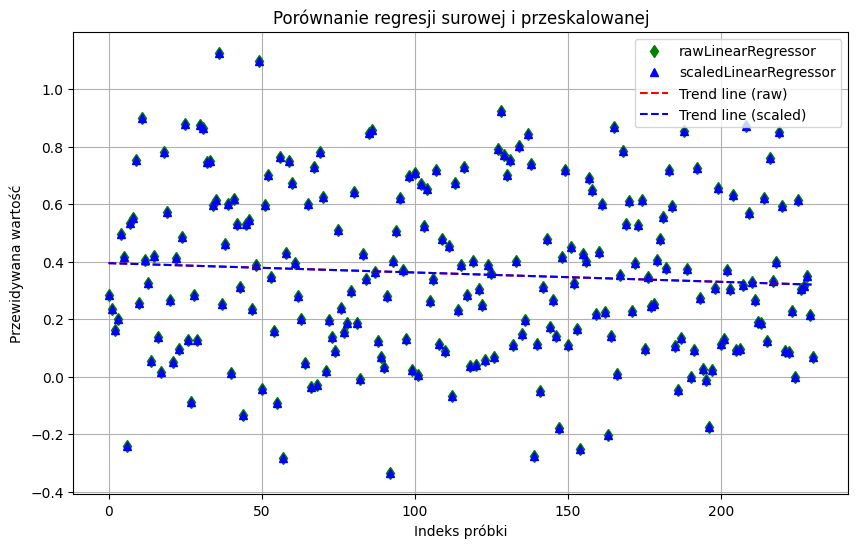

In [55]:
x = np.arange(len(y_pred))

# Dla danych przed przeskalowaniem - RAW
z_raw = np.polyfit(x, y_pred_raw, 1)
p_raw = np.poly1d(z_raw)
trend_raw = p_raw(x)


# Dla danych po skalowaniu - SCALED
z_scaled = np.polyfit(x, y_pred_scaled, 1)
p_scaled = np.poly1d(z_scaled)
trend_scaled = p_scaled(x)

print(f"Współczynniki modelu surowego: {model_linear_raw.coef_}")
print(f"Współczynniki modelu przeskalowanego: {model_linear_scaled.coef_}")

plt.figure(figsize=(10, 6))
plt.plot(y_pred_raw, "gd", label="rawLinearRegressor")
plt.plot(y_pred_scaled, "b^", label="scaledLinearRegressor")
plt.plot(trend_raw, "r--", label="Trend line (raw)")
plt.plot(trend_scaled, "b--", label="Trend line (scaled)")
plt.title("Porównanie regresji surowej i przeskalowanej")
plt.xlabel("Indeks próbki")
plt.ylabel("Przewidywana wartość")
plt.grid(True)
plt.legend()
plt.show()

Linia trendu jest płaska i przechodzi w okolicach wartości 0.4-0.3. Jednak występuje znaczne rozproszenie wartości, a linia trendu jest realnie bardziej środkiem ciężkości niż miejscem kondensacji wyników.

In [56]:
print(f"Średni błąd kwadratowy (MSE): {mean_squared_error(y_test, y_pred_scaled):.2f}")
print(f"Średni błąd absolutny (MAE): {mean_absolute_error(y_test, y_pred_scaled):.2f}")
print(f"Współczynnik determinacji (R²): {r2_score(y_test, y_pred_scaled):.2f}")
print(f"Wyjaśniona wariancja: {explained_variance_score(y_test, y_pred_scaled):.2f}")

Średni błąd kwadratowy (MSE): 0.18
Średni błąd absolutny (MAE): 0.35
Współczynnik determinacji (R²): 0.22
Wyjaśniona wariancja: 0.22


## Wnioski

Mimo iż model został przeskalowany to nie przyniosło to znacznych korzyści. Możemy zauważyć, że dane przed przeskalowaniem "zielone diamenty" mają takie samo rozporszenie jak  "niebieskie trójkąty", które zostały poddane skalowaniu (pokrywają się).
Nie można jednoznacznie określić linii trendu dla żadnego ze zbiorów (ani Raw ani Scaled), co oznacza, że dane nie mają silnej liniowej zależności i należałoby sprawdzić inne modele do naszego uczenia maszynowego.

# Etap 3: Dwa dodatkowe modele do porównania

Model regresjii liniowej okazał się niedostosowany do danych, w związku z czym postanowiliśmy dodać i zmienić model benchmarkowy na model regresji logistycznej, który lepiej nadaje się do predykcji zdarzeń binarnych.

Jako 2 dodatkowe modele do porównania wybraliśmy:
- Model Drzew Losowych (Random Forrest)
- Model XGBoost


Modele porównywane będą wstępnie przy pomocy 4 narzędz:
- wskaźnika dokładności (accuracy)
- macierzy Confusion Matrix (błędne/pozytywne negatywy/pozytywy)
- raportu Classification Report (wyniki wskaźników: precision, recall, f1-score oraz support)
- ważność poszczególnych cech w modelach

## model 2: regresja logistyczna (lepszy benchmark niż regresja liniowa do porównania modeli)

In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [58]:
# przygotowanie danych
X = df.drop('Diabetes', axis=1)
y = df['Diabetes']

# podział na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# standaryzacja
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [59]:
# model regresji logistycznej
model_logisticReg = LogisticRegression()
model_logisticReg.fit(X_train_scaled, y_train)

LogisticRegression()

In [60]:
# predykcja
y_pred_LogReg = model_logisticReg.predict(X_test_scaled)

# ocena modelu
accuracy_LR = accuracy_score(y_test, y_pred_LogReg)
conf_matrix_LR = confusion_matrix(y_test, y_pred_LogReg)
report_LR = classification_report(y_test, y_pred_LogReg)

print(f'Accuracy: {accuracy_LR:.4f}')
print('Confusion Matrix:')
print(conf_matrix_LR)
print('\nClassification Report:')
print(report_LR)

Accuracy: 0.7727
Confusion Matrix:
[[83 16]
 [19 36]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.84      0.83        99
           1       0.69      0.65      0.67        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



Wizualiacja wyników

In [61]:
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt

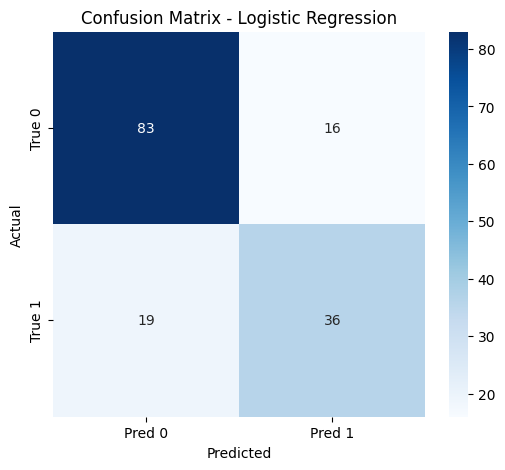

In [62]:
# wizualizacja confusion_matrix
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix_LR, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred 0', 'Pred 1'], yticklabels=['True 0', 'True 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

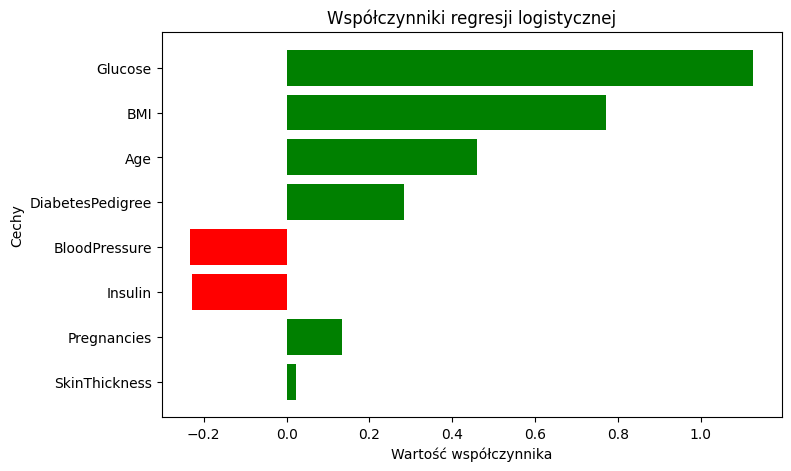

In [63]:
# ważność cech
coef = model_logisticReg.coef_[0]
features = X.columns

coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coef})
coef_df = coef_df.sort_values(by='Coefficient', key=abs, ascending=False)

plt.figure(figsize=(8,5))
colors = ['green' if c > 0 else 'red' for c in coef_df['Coefficient']]
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color=colors)
plt.title('Współczynniki regresji logistycznej')
plt.xlabel('Wartość współczynnika')
plt.ylabel('Cechy')
plt.gca().invert_yaxis()
plt.show()

## model 3: Random Forrest

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [65]:
# przygotowanie danych
X = df.drop('Diabetes', axis=1)
y = df['Diabetes']

In [66]:
# podział na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# standaryzacja
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [67]:
# trenowanie modelu Random Forest
rf_model = RandomForestClassifier(
    n_estimators=10,      # liczba drzew
    max_depth=5,          # głębokość drzewa
    random_state=42
)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=5, n_estimators=10, random_state=42)

In [68]:
# predykcje
y_pred_rf = rf_model.predict(X_test_scaled)

# ocena modelu
accuracy_RF = accuracy_score(y_test, y_pred_rf)
conf_matrix_RF = confusion_matrix(y_test, y_pred_rf)
report_RF = classification_report(y_test, y_pred_rf)

print(f'Accuracy: {accuracy_RF:.4f}')
print('Confusion Matrix:')
print(conf_matrix_RF)
print('\nClassification Report:')
print(report_RF)

Accuracy: 0.7468
Confusion Matrix:
[[84 15]
 [24 31]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.85      0.81        99
           1       0.67      0.56      0.61        55

    accuracy                           0.75       154
   macro avg       0.73      0.71      0.71       154
weighted avg       0.74      0.75      0.74       154



Wizualizacja wyników modelu

In [69]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

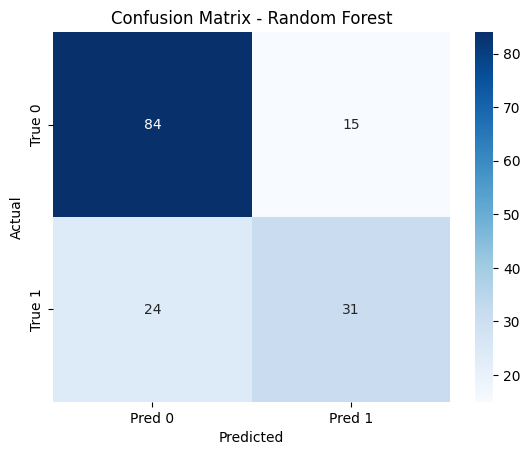

In [70]:
# wizualizacja confusion_matrix

sns.heatmap(conf_matrix_RF, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred 0', 'Pred 1'], yticklabels=['True 0', 'True 1'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

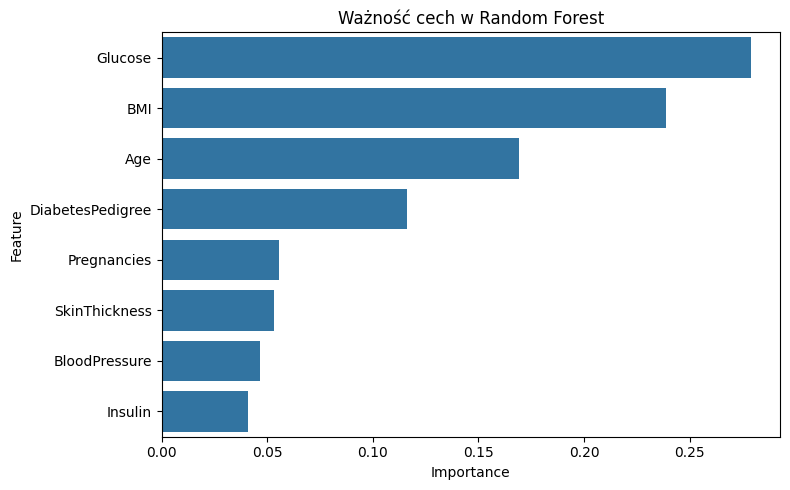

In [71]:
# wizualizacja ważnośći cech w modelu
importances = rf_model.feature_importances_
features = X.columns

feat_importance = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_importance.sort_values(by='Importance', ascending=False, inplace=True)

# wykres
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=feat_importance)
plt.title('Ważność cech w Random Forest')
plt.tight_layout()
plt.show()

In [72]:
from sklearn.tree import plot_tree

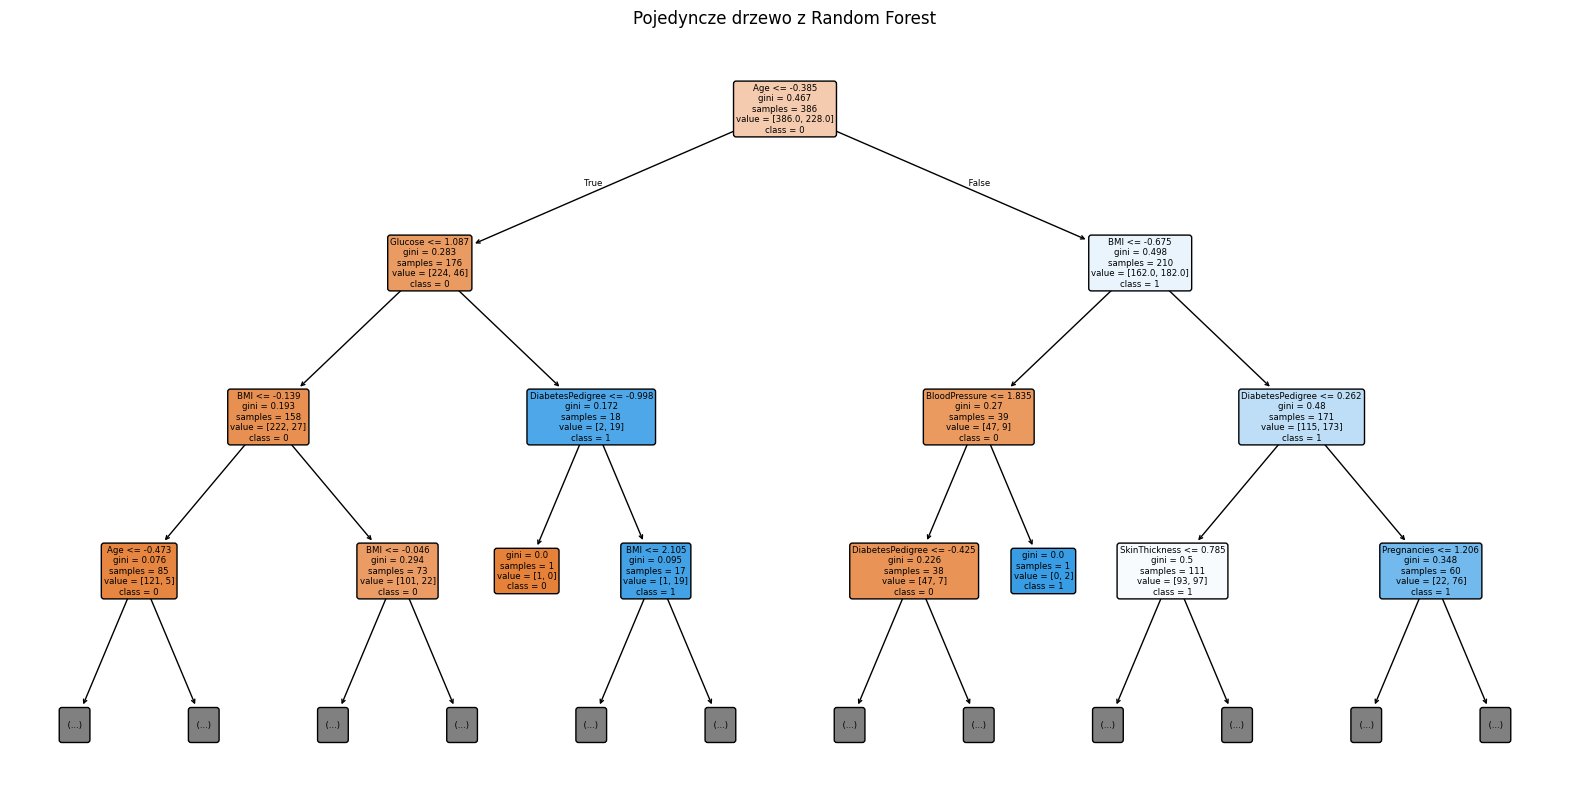

In [73]:
# wizualizacja jednego drzewa z lasu
estimator = rf_model.estimators_[4]

plt.figure(figsize=(20, 10))
plot_tree(estimator, feature_names=X.columns, class_names=['0', '1'], filled=True, rounded=True, max_depth=3)
plt.title("Pojedyncze drzewo z Random Forest")
plt.show()

## model 4: XGBoost

In [74]:
!pip install xgboost

In [75]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [76]:
# dane wejściowe - 5 wybranych cech
X = df.drop('Diabetes', axis=1)
y = df['Diabetes']

In [77]:
# podział danych
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [78]:
# Model XGBoost
xgb_model = xgb.XGBClassifier(
    n_estimators=10,
    max_depth=4,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric=
    'logloss',
    random_state=42
)

xgb_model.fit(X_train_scaled, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:03:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=10,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [79]:
# predykcja
y_pred_xgb = xgb_model.predict(X_test_scaled)

# ocena modelu
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
report_xgb = classification_report(y_test, y_pred_xgb)

print(f'Accuracy: {accuracy_xgb:.4f}')
print('Confusion Matrix:')
print(conf_matrix_xgb)
print('\nClassification Report:')
print(report_xgb)

Accuracy: 0.7857
Confusion Matrix:
[[92  7]
 [26 29]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.93      0.85        99
           1       0.81      0.53      0.64        55

    accuracy                           0.79       154
   macro avg       0.79      0.73      0.74       154
weighted avg       0.79      0.79      0.77       154



Wizualizacje modelu XGBoost

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns


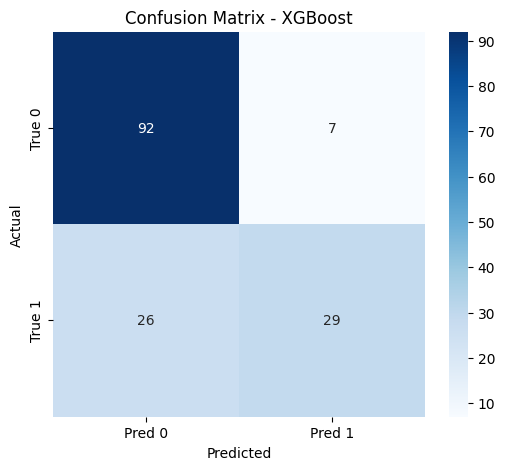

In [81]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Pred 0', 'Pred 1'], yticklabels=['True 0', 'True 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - XGBoost')
plt.show()

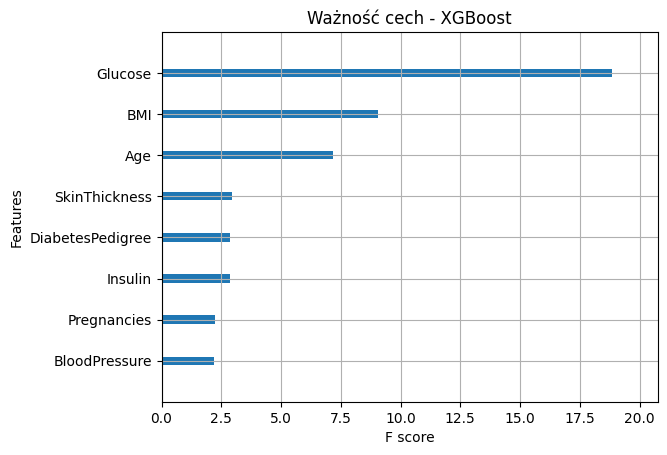

In [82]:
# ważność cech
feature_names = X.columns

booster = xgb_model.get_booster()
booster.feature_names = list(feature_names)

xgb.plot_importance(booster, importance_type='gain', show_values=False)
plt.title('Ważność cech - XGBoost')
plt.show()

## Wnioski wstępne dla 3 modeli

**Wnioski:** Na podstawie przeprowadzonej analizy najlepszym modelem okazał się XGBoost, osiągając najwyższą precyzję na poziomie 0,7857. Warto jednak zauważyć, że 2 pozostałe modele  wykazały porównywalną skuteczność (Regresja logistyczna: 0.7727, Random Forest: 0.7468), uzyskując wyniki na względnie wysokim poziomie. Warto zbadać w dalszej analizie skutecznosci modeli stosunek niezidentyfikowanych do zidetyfikowanych pozytywów, co jest istone zwłaszcza biorąc pod uwagę cel modelu: idetyfikację cukrzycy. Nie bez znaczenia będą również błędne diagnozy u osób zdrowych, jednak mają one najmniejszy udział w wynikach modeli.

# Etap 4: Hiperparametryzacja modeli

## model regresji logistycznej

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# parametry do przeszukania
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1'],
    'solver': ['lbfgs', 'liblinear']
}

# model bazowy
logreg = LogisticRegression(max_iter=1000)

# GridSearchCV
grid_search_logreg = GridSearchCV(
    estimator=logreg,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# dopasowanie do danych treningowych
grid_search_logreg.fit(X_train_scaled, y_train)

# predykcja
best_logreg = grid_search_logreg.best_estimator_
y_pred_LogReg = best_logreg.predict(X_test_scaled)

# ocena
accuracy_LR = accuracy_score(y_test, y_pred_LogReg)
conf_matrix_LR = confusion_matrix(y_test, y_pred_LogReg)
report_LR = classification_report(y_test, y_pred_LogReg)

# wyniki
print("Najlepsze parametry:", grid_search_logreg.best_params_)
print(f'Accuracy: {accuracy_LR:.4f}')
print('Confusion Matrix:')
print(conf_matrix_LR)
print('\nClassification Report:')
print(report_LR)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Najlepsze parametry: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy: 0.7662
Confusion Matrix:
[[82 17]
 [19 36]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.83      0.82        99
           1       0.68      0.65      0.67        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.77       154



/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solver

## model Random Forest

In [87]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# parametry do przeszukania
param_grid = {
    'n_estimators': [10, 70, 80, 90],
    'max_depth': [None, 5, 8, 10],
    'min_samples_split': [1, 2, 3],
    'min_samples_leaf': [1, 2, 3],
    'bootstrap': [True, False]
}

# model bazowy
rf = RandomForestClassifier(random_state=42)

# Grid Search z 5-krotną walidacją krzyżową
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=1, scoring='accuracy')

# dopasowanie modelu do danych treningowych
grid_search.fit(X_train_scaled, y_train)

# najlepsze parametry
print("Najlepsze parametry:", grid_search.best_params_)

# predykcja
best_rf = grid_search.best_estimator_
y_pred_rf = best_rf.predict(X_test_scaled)

# ocena modelu
accuracy_RF = accuracy_score(y_test, y_pred_rf)
conf_matrix_RF = confusion_matrix(y_test, y_pred_rf)
report_RF = classification_report(y_test, y_pred_rf)

# wyświetlenie wyników
print(f'Accuracy: {accuracy_RF:.4f}')
print('Confusion Matrix:')
print(conf_matrix_RF)
print('\nClassification Report:')
print(report_RF)


Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Najlepsze parametry: {'bootstrap': True, 'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 80}
Accuracy: 0.7468
Confusion Matrix:
[[78 21]
 [18 37]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
480 fits failed out of a total of 1440.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
480 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/uti

## model XGBoost

In [88]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# parametry do przeszukania
param_grid = {
    'n_estimators': [10, 25, 50, 100, 200],
    'max_depth': [3, 4, 5, 8],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

# model bazowy
xgb_clf = xgb.XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# Grid Search z 5-krotną walidacją
grid_search_xgb = GridSearchCV(
    estimator=xgb_clf,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# dopasowanie modelu
grid_search_xgb.fit(X_train_scaled, y_train)

# najlepsze parametry
print("Najlepsze parametry:", grid_search_xgb.best_params_)

# predykcja
best_xgb = grid_search_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_test_scaled)

# Ocena
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
report_xgb = classification_report(y_test, y_pred_xgb)

# Wyniki
print(f'Accuracy: {accuracy_xgb:.4f}')
print('Confusion Matrix:')
print(conf_matrix_xgb)
print('\nClassification Report:')
print(report_xgb)


Fitting 5 folds for each of 540 candidates, totalling 2700 fits
Najlepsze parametry: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 25, 'subsample': 0.8}
Accuracy: 0.7662
Confusion Matrix:
[[83 16]
 [20 35]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.84      0.82        99
           1       0.69      0.64      0.66        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.76       154



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:10:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


## wizualizacja dla modeli po wizualizacji

In [89]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

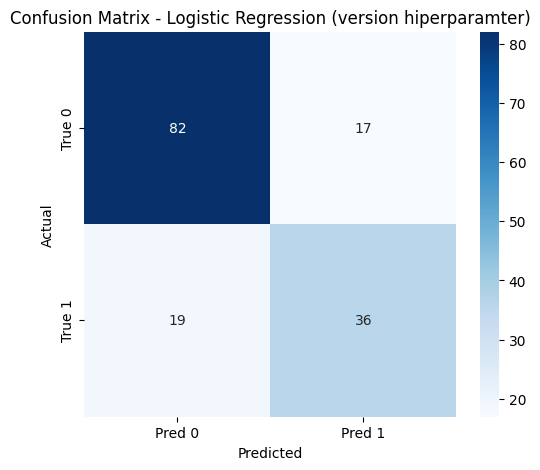

In [90]:
# wizualizacja confusion_matrix RL
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix_LR, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred 0', 'Pred 1'], yticklabels=['True 0', 'True 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression (version hiperparamter)')
plt.show()

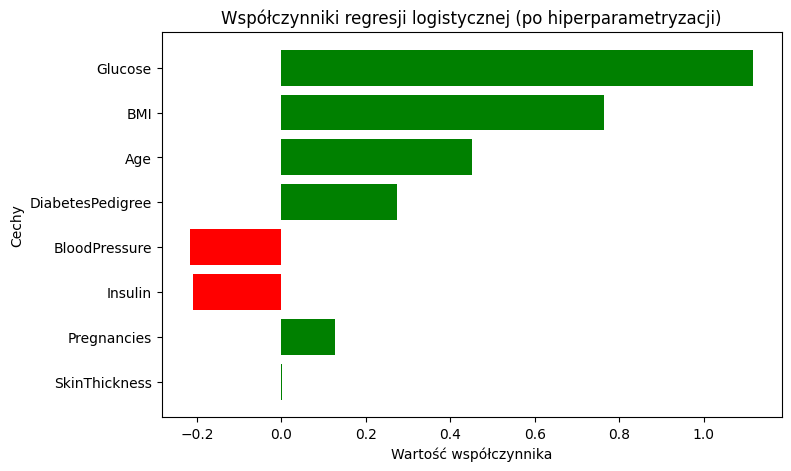

In [91]:
# ważność cech RL
coef = best_logreg.coef_[0]
features = X.columns

coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coef})
coef_df = coef_df.sort_values(by='Coefficient', key=abs, ascending=False)

plt.figure(figsize=(8,5))
colors = ['green' if c > 0 else 'red' for c in coef_df['Coefficient']]
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color=colors)
plt.title('Współczynniki regresji logistycznej (po hiperparametryzacji)')
plt.xlabel('Wartość współczynnika')
plt.ylabel('Cechy')
plt.gca().invert_yaxis()
plt.show()

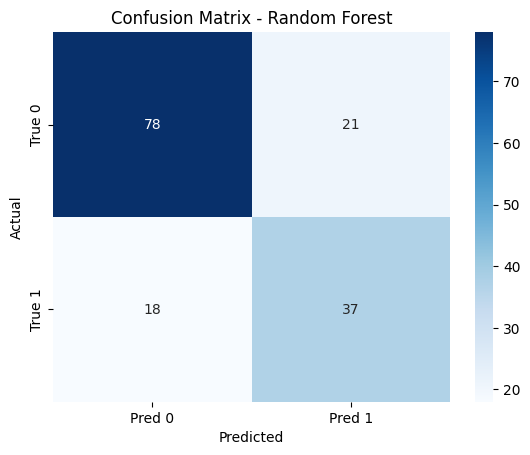

In [92]:
# wizualizacja confusion_matrix RF
sns.heatmap(conf_matrix_RF, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred 0', 'Pred 1'], yticklabels=['True 0', 'True 1'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

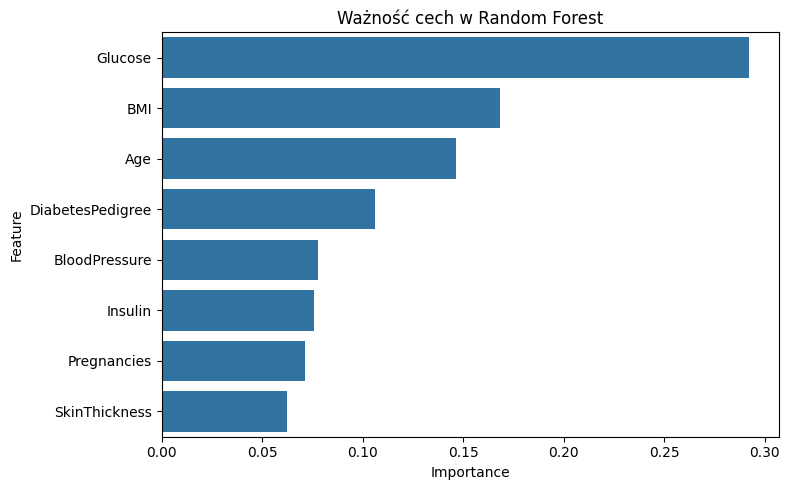

In [93]:
# wizualizacja ważnośći cech w modelu RF
importances = best_rf.feature_importances_
features = X.columns

feat_importance = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_importance.sort_values(by='Importance', ascending=False, inplace=True)

# wykres
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=feat_importance)
plt.title('Ważność cech w Random Forest')
plt.tight_layout()
plt.show()

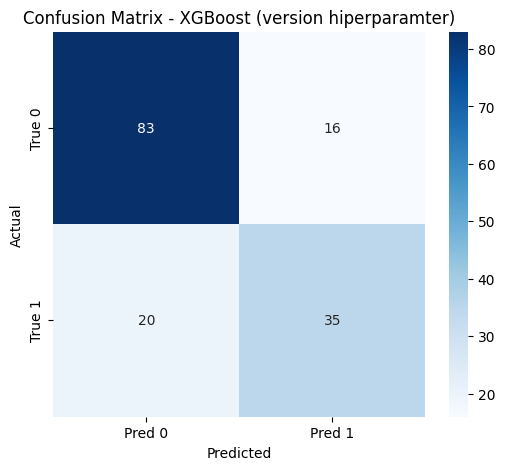

In [94]:
# wizualizacja confusion_matrix XGB
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Pred 0', 'Pred 1'], yticklabels=['True 0', 'True 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - XGBoost (version hiperparamter)')
plt.show()

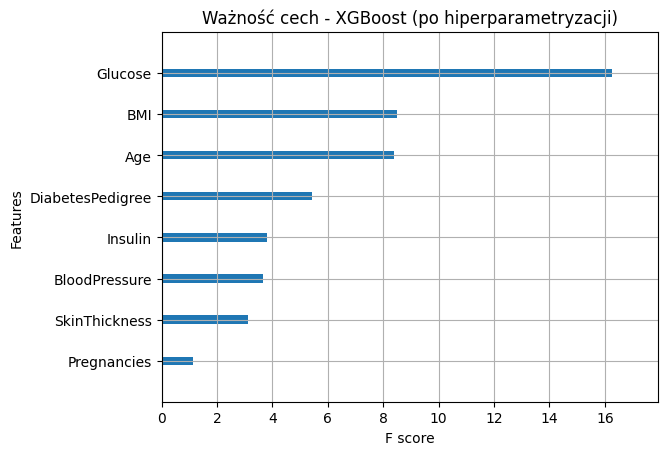

In [95]:
# ważność cech XGB
feature_names = X.columns

booster = best_xgb.get_booster()
booster.feature_names = list(feature_names)

xgb.plot_importance(booster, importance_type='gain', show_values=False)
plt.title('Ważność cech - XGBoost (po hiperparametryzacji)')
plt.show()